## Import all the libraries


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from quantities import ms, s, Hz
from elephant.spike_train_generation import homogeneous_poisson_process, homogeneous_gamma_process
import elephant
from scipy.io import loadmat
from elephant.statistics import isi, cv, mean_firing_rate, cv2
import sklearn
import os
from elephant.statistics import mean_firing_rate

Fs = 1.017252624511719e+03


In [11]:
# Read Cb indirect data
def read_Cb_data(path):
    data = loadmat(path+'/Timestamps_Cb.mat')

    data_arr = data['TimeStamps2']
    label_arr = data['Labels2']
    type(data_arr)

    a = []
    ch = []
    unit = [] 
    for j in range(0,data_arr.shape[1]):
        for i in range(0,data_arr.shape[0]):
            if(data_arr[i,j].size > 0 and label_arr[i,j].size > 0):
                if label_arr[i,j][0] == 'good':
#                     print(data_arr[i,j].shape)
                    a.append(data_arr[i,j])
                    ch.append(j)
                    unit.append(i)
#                     print(i)
#     print(ch)
    return a,ch,unit 


In [12]:
# Read direct units
def read_Direct(path):
    data = loadmat(path+'/Timestamps_Direct.mat')
#     print(data)
    data_arr = data['TimeStamps_tp']
#     print(data_arr.shape)
#     label_arr = data['Labels2']
#     type(data_arr)
    
    a = []
    for i in range(0,data_arr.shape[0]):
        for j in range(0,data_arr.shape[1]):
            if(data_arr[i,j].size > 0):
                a.append(np.reshape(data_arr[i,j][:],(1,len(data_arr[i,j]))))
#     print(a)
    data_arr = data['TimeStamps_tn']
    for i in range(0,data_arr.shape[0]):
        for j in range(0,data_arr.shape[1]):
            if(data_arr[i,j].size > 0):
                a.append( np.reshape(data_arr[i,j][:],(1,len(data_arr[i,j]))))                
    return a 

In [13]:
# Get mean firing rate
def get_firing_rate(a):
    fr = []
    for i in range(len(a)):
        fr.append(mean_firing_rate(a[i][0]*1000/Fs))
        
    return fr

In [21]:
# Get 5 percentile ISI
def get_isiperc5(a):
    isiperc5 = []
    for i in range(len(a)):
        isiperc5.append(np.percentile(a[i], 5)*1000)
    
    return isiperc5
    

In [14]:
# get ISI from timestamps
def get_isi(a):
    _isi = []
    for i in range(len(a)):
        _isi.append(np.array(isi(a[i][0]*1000/Fs)))
#     print(_isi)    
    return _isi

In [15]:
# get CV log feature
import math
def get_cvlog(a):
    count = 0
    cvlog = []
#     pur = []
    for i in range(len(a)):

        cvlog.append(elephant.statistics.cv(np.log(isi(a[i][0]*1000/Fs))))
    return cvlog

In [17]:
# get CV2 feature
def get_cv2(a):
    count = 0
    cv2 = []
#     pur = []
    for i in range(len(a)):
        if elephant.statistics.cv2(isi(a[i][0]*1000/Fs)) > 0.2:
            count = count + 1 
#             pur.append()
#         print(isi(a[i][0]*1000/Fs))
        cv2.append(elephant.statistics.cv2(isi(a[i][0]*1000/Fs)))

    return cv2

In [18]:
from statistics import median
# get MAD feature
def get_mad(a):
    MAD = []
#     if(len(a)>1):
    for i in range(len(a)):
        medianISI =  median(isi(a[i][0]*1000/Fs))
        ISIdiff = abs(isi(a[i][0]*1000/Fs)-medianISI )
        MAD.append(median(ISIdiff))
#     else:
#         medianISI =  median(isi(a[0]*1000/Fs))
#         ISIdiff = abs(isi(a[0]*1000/Fs)-medianISI )
#         MAD.append(median(ISIdiff))
    return MAD

# Check cell type for all Cb units

I096-211104-134920
CV2: 0.9196975652121538, FR: 58.32386700181752, MAD: 0.007650429928350633, CVlog: -0.23788046487611914, ISIperc5: 1.449555144063197
CV2: 0.8897259141800911, FR: 82.25788820066057, MAD: 0.005234504687905428, CVlog: -0.21844984293040307, ISIperc5: 1.087166358217928
CV2: 0.9040243391924317, FR: 65.88833074941786, MAD: 0.006200874783806043, CVlog: -0.2494377898934593, ISIperc5: 1.0066355168873997
CV2: 0.8950571809883453, FR: 97.39182954973998, MAD: 0.004509727115305395, CVlog: -0.2109486412607025, ISIperc5: 0.9261046755568714
CV2: 0.9169764883145229, FR: 62.29283317182845, MAD: 0.006925652356301271, CVlog: -0.2362408602262113, ISIperc5: 1.3287588826642605
CV2: 0.8809736194657846, FR: 69.43151859894314, MAD: 0.00640220188654439, CVlog: -0.21122491005784877, ISIperc5: 1.731413089146372
CV2: 0.8648199461288966, FR: 103.30324283669965, MAD: 0.0042278691709043414, CVlog: -0.1866898053213449, ISIperc5: 1.167697199889517
CV2: 0.9053417789861118, FR: 82.00728096374358, MAD: 0.00

CV2: 0.915828605401554, FR: 62.965433109021475, MAD: 0.007207510300645481, CVlog: -0.23264246110133796, ISIperc5: 1.3690243026758253
CV2: 0.6820405527811372, FR: 80.16471631099662, MAD: 0.006080078521563337, CVlog: -0.18044561280672142, ISIperc5: 2.5769869231453413
CV2: 0.8853869907937033, FR: 89.54441061104866, MAD: 0.004831850480911726, CVlog: -0.2009260407599978, ISIperc5: 1.2482280408789848
CV2: 0.9027186828293345, FR: 81.83291823268667, MAD: 0.005516362632192795, CVlog: -0.21236676417857464, ISIperc5: 1.2884934615158272
CV2: 0.9412569158725447, ISIperc5: 1.691147668452686
CV2: 0.9453157879903387, ISIperc5: 1.570351406314785
CV2: 0.9151940723490275, FR: 57.662533395245305, MAD: 0.007932287872904453, CVlog: -0.23406921234136743, ISIperc5: 1.6508822479863738
CV2: 0.9050987766124517, FR: 70.62652432315848, MAD: 0.00640220188688545, CVlog: -0.22492518994378924, ISIperc5: 1.2482280412768887
CV2: 0.9111497291017556, FR: 86.09268784056607, MAD: 0.005315035529065426, CVlog: -0.208178960548

CV2: 0.967786393830979, ISIperc5: 1.9327401923874277
CV2: 0.9578914669138482, ISIperc5: 2.0938018742526765
CV2: 0.9526465176630243, ISIperc5: 1.6508822473042528
CV2: 0.9644400366176449, ISIperc5: 2.174332716549543
CV2: 0.660725007387277, ISIperc5: 1.6911476682253124
CV2: 0.8530609524356801, ISIperc5: 1.6508822473042528
CV2: 0.9652950949315104, ISIperc5: 1.81194393030637
CV2: 0.9516284478945052, ISIperc5: 1.731413089146372
CV2: 0.9449774322142994, ISIperc5: 1.7716785098400578
CV2: 0.9199906432513303, FR: 51.72038810622405, MAD: 0.0078114916109370824, CVlog: -0.26948185039582134, ISIperc5: 1.127431778911614
CV2: 0.9409619037885921, ISIperc5: 1.4092897240516322
CV2: 0.9544299570789468, ISIperc5: 1.530085985621099
CV2: 0.9472583429195972, ISIperc5: 2.4561906611779705
CV2: 0.7379066389663429, ISIperc5: 1.4898205649842566
CV2: 0.6849766800436901, ISIperc5: 1.8119439305337437
CV2: 0.9540767347949897, ISIperc5: 1.852209351000056
CV2: 0.8277109852963681, ISIperc5: 2.7380486058490305
CV2: 0.9590

CV2: 0.9079005261642247, ISIperc5: 1.892474771466368
CV2: 0.9487307019191088, ISIperc5: 1.6508822477590002
CV2: 0.9444170466577342, ISIperc5: 1.4898205649842566
CV2: 0.9384509338485881, ISIperc5: 1.4898205649842566
CV2: 0.9276769282447633, ISIperc5: 1.731413089146372
CV2: 0.9421376487948464, ISIperc5: 1.6106168269800492
CV2: 0.9445838443294455, ISIperc5: 1.6911476686800597
CV2: 0.9261042187925543, FR: 64.91094169583884, MAD: 0.0071269794591444224, CVlog: -0.2314579421463632, ISIperc5: 1.2079626203558291
CV2: 0.8980378269252994, FR: 66.07715459906115, MAD: 0.006804856093708622, CVlog: -0.22196433152658943, ISIperc5: 1.4898205649842566
CV2: 0.944972246108803, ISIperc5: 2.295128978403227
CV2: 0.9340455175583087, ISIperc5: 1.852209351000056
CV2: 0.9100712289484721, ISIperc5: 1.4898205649842566
CV2: 0.9307447403280008, ISIperc5: 1.4092897240516322
CV2: 0.9272066475666197, ISIperc5: 1.1676971994347696
CV2: 0.9442794388272566, ISIperc5: 1.328758882209513
CV2: 0.9194409543373527, ISIperc5: 2.1

CV2: 0.975145974571342, ISIperc5: 1.7716785096126841
CV2: 0.9588692529433637, ISIperc5: 1.731413089146372
CV2: 0.9649446569388113, ISIperc5: 1.4898205649842566
CV2: 0.9801372647666623, ISIperc5: 2.013271034229547
CV2: 0.9705838682690745, ISIperc5: 1.5703514063716284
CV2: 0.9577351775795082, ISIperc5: 1.731413089146372
CV2: 0.9587847914096405, ISIperc5: 1.5300859856779425
CV2: 0.9650260556767727, ISIperc5: 1.7716785096126841
CV2: 0.9503035412566079, ISIperc5: 1.4495551445179444
CV2: 0.9410276015957251, ISIperc5: 1.8119439305337437
CV2: 0.9051115808005739, ISIperc5: 1.7314130889189983
CV2: 0.965268834415294, ISIperc5: 1.81194393030637
CV2: 0.9519606469607603, ISIperc5: 1.3690243026758253
CV2: 0.9717130643025856, ISIperc5: 1.8119439305337437
CV2: 0.9605366849582055, ISIperc5: 1.4092897235968849
CV2: 0.9713534435670161, ISIperc5: 1.3690243029213622
CV2: 0.9724322930926187, ISIperc5: 1.6106168268748888
CV2: 0.9674582087936449, ISIperc5: 1.7314130889758417
CV2: 0.9739210909635614, ISIperc5: 

CV2: 0.9614611371119319, ISIperc5: 1.852209351000056
CV2: 0.924836576626771, FR: 60.275031157656436, MAD: 0.007368571981714922, CVlog: -0.24082229937351401, ISIperc5: 1.3690243026758253
CV2: 0.9609607860007445, ISIperc5: 1.3569446759902641
CV2: 0.9646641055961119, ISIperc5: 1.5300859854505688
CV2: 0.968593726313689, ISIperc5: 2.093801875162171
CV2: 0.9591801456292338, ISIperc5: 1.4495551445179444
CV2: 0.9632639656533482, ISIperc5: 1.7716785091579368
CV2: 0.9556607833200511, ISIperc5: 1.731413089146372
CV2: 0.9753748539272348, ISIperc5: 1.5703514063716284
CV2: 0.9776351129125667, ISIperc5: 1.6508822473042528
CV2: 0.9890088298440501, ISIperc5: 2.3756598197905987
CV2: 0.9577303122546698, ISIperc5: 1.6106168277474353
CV2: 0.9788260368871614, ISIperc5: 1.8119439305337437
CV2: 0.9591434885438342, ISIperc5: 1.7314130882368772
CV2: 0.9615800342227191, ISIperc5: 1.811943930988491
CV2: 0.9717038269589254, ISIperc5: 1.7716785096126841
CV2: 0.9616078071121802, ISIperc5: 1.7314130886916246
CV2: 1.0

CV2: 0.9279168269623116, FR: 72.61733084683972, MAD: 0.006080078521904397, CVlog: -0.22476822030952642, ISIperc5: 1.0871663580473978
CV2: 0.9672675196778975, ISIperc5: 1.1676971994347696
CV2: 0.9450537292285421, FR: 63.13484516493485, MAD: 0.007247775721509697, CVlog: -0.23425313150800225, ISIperc5: 1.2079626203558291
CV2: 0.9455196418586156, FR: 73.72335718869162, MAD: 0.006160609362950709, CVlog: -0.22857491676122033, ISIperc5: 1.0066355171147734
CV2: 0.9312054887221876, FR: 85.37335272243597, MAD: 0.005194239266728573, CVlog: -0.21922769754866844, ISIperc5: 0.9663700961937138
CV2: 0.935670390144717, FR: 75.57157088518943, MAD: 0.006120343942257023, CVlog: -0.22080035721456812, ISIperc5: 1.1676971994347696
CV2: 0.9450210433757575, ISIperc5: 1.369024302903199
CV2: 0.8725701845946816, FR: 79.14301441066904, MAD: 0.004066807487106416, CVlog: -0.22348494511519354, ISIperc5: 0.9663700959663402
CV2: 0.9574161154062032, FR: 69.53428252655075, MAD: 0.006684059832195999, CVlog: -0.23370904672

CV2: 0.8931748023563205, FR: 63.87605712148488, MAD: 0.006724325252470464, CVlog: -0.22561420454547917, ISIperc5: 1.5300859859053162
CV2: 0.878672221157333, FR: 97.24964945348006, MAD: 0.004308400011723279, CVlog: -0.2026318405811509, ISIperc5: 1.12743177851371
CV2: 0.872306185048915, FR: 93.9468211746148, MAD: 0.004630523378182261, CVlog: -0.19541060593865664, ISIperc5: 1.2482280408221413
CV2: 0.8699647035614307, FR: 59.70795120631749, MAD: 0.006603528990581253, CVlog: -0.23067591060166912, ISIperc5: 1.5300859855926774
CV2: 0.8994814642755125, FR: 84.13238952850395, MAD: 0.005234504687905428, CVlog: -0.20803005356112633, ISIperc5: 1.1676971989800222
CV2: 0.8644657333531396, FR: 96.0110084319423, MAD: 0.003986276645264297, CVlog: -0.20698485718131712, ISIperc5: 1.0469009375810856
CV2: 0.9276060783564005, ISIperc5: 1.6911476683389992
CV2: 0.9247846346926287, FR: 66.67779981848446, MAD: 0.006603528990126506, CVlog: -0.22874226926087246, ISIperc5: 1.2482280408221413
CV2: 0.908759738756878

CV2: 0.9483713490442535, ISIperc5: 1.6911476686800597
CV2: 0.9339815602673067, FR: 63.59640929244084, MAD: 0.006804856093367562, CVlog: -0.2347544751175144, ISIperc5: 1.2079626199010818
CV2: 0.8967068303792579, FR: 76.44671867198718, MAD: 0.005798220576707536, CVlog: -0.21026485977731807, ISIperc5: 1.4092897235968849
CV2: 0.9083416774893245, FR: 81.76970021019481, MAD: 0.0053955663706801715, CVlog: -0.21218464447927007, ISIperc5: 1.2079626203558291
CV2: 0.9350053790519066, FR: 57.631244189043436, MAD: 0.007892022452438141, CVlog: -0.23609302988723838, ISIperc5: 1.36902430358532
CV2: 0.9164243839276429, FR: 61.69178446433002, MAD: 0.006804856094049683, CVlog: -0.23999678343985045, ISIperc5: 1.2079626201284555
CV2: 0.9337897251759202, ISIperc5: 1.6508822476453133
CV2: 0.9324766686949237, FR: 77.24165037353853, MAD: 0.005919016839925462, CVlog: -0.21969608366815419, ISIperc5: 1.1274317788547705
CV2: 0.8624249664325842, FR: 122.65041439205129, MAD: 0.003301764495063253, CVlog: -0.185455090

CV2: 0.9481198223378435, ISIperc5: 1.3287588824368868
CV2: 0.9307290582622532, FR: 55.55247168518746, MAD: 0.00789202245209708, CVlog: -0.24153555577690086, ISIperc5: 1.3287588823857277
CV2: 0.8672598562517331, FR: 118.64462648543054, MAD: 0.0036238878610674874, CVlog: -0.18826679259710707, ISIperc5: 0.966370096179503
CV2: 0.8888581312846804, ISIperc5: 1.4898205649842566
CV2: 0.9077453735637169, FR: 74.70374657922714, MAD: 0.006039813100898073, CVlog: -0.2142107735426616, ISIperc5: 1.2884934612884535
CV2: 0.9176187830875834, FR: 94.75120559644736, MAD: 0.004791585060502257, CVlog: -0.2069396063491314, ISIperc5: 1.0469009375810856
CV2: 0.8940846548320616, FR: 61.40026588964824, MAD: 0.006442467307920197, CVlog: -0.2539592797783138, ISIperc5: 1.046900938035833
CV2: 0.9424437189136021, ISIperc5: 1.6508822476453133
CV2: 0.8954270556166078, ISIperc5: 1.2482280408221413
CV2: 0.933081278755602, ISIperc5: 1.731413089146372
CV2: 0.885374174382365, ISIperc5: 0.9261046752726543
CV2: 0.89281164947

CV2: 0.9401257922535166, ISIperc5: 1.6508822475316265
CV2: 0.9072741584228659, FR: 71.17707208669428, MAD: 0.006321671045952826, CVlog: -0.22155971539897798, ISIperc5: 1.449555144063197
CV2: 0.8830732482855914, FR: 100.88347996948129, MAD: 0.004308400012178026, CVlog: -0.19487249316371708, ISIperc5: 1.2079626199010818
CV2: 0.9233359637718269, FR: 77.52241730156497, MAD: 0.005798220577162283, CVlog: -0.21920550054970037, ISIperc5: 1.1676971995484564
CV2: 0.9092226519593335, FR: 74.92443136018737, MAD: 0.005999547680545447, CVlog: -0.21562658164220322, ISIperc5: 1.3690243026758253
CV2: 0.8773108581549207, FR: 83.56349272901788, MAD: 0.005113708425369623, CVlog: -0.2109562575094461, ISIperc5: 1.288493461743201
CV2: 0.9237317737921906, FR: 60.46426010012892, MAD: 0.007368571983192851, CVlog: -0.23313434007574615, ISIperc5: 1.5703514068263758
CV2: 0.874214193783374, FR: 109.97293882623786, MAD: 0.0038252149638537958, CVlog: -0.18969418663439108, ISIperc5: 1.1676971994347696
CV2: 0.930532701

CV2: 0.9721394136861159, ISIperc5: 1.8522093512274296
CV2: 0.9708704153963356, ISIperc5: 2.3756598197905987
CV2: 0.9697002096852427, ISIperc5: 1.6508822473042528
CV2: 0.9540211476560636, ISIperc5: 2.093801875162171
CV2: 0.9657631931154111, ISIperc5: 1.6911476686800597
CV2: 0.9369674791526165, ISIperc5: 1.4495551445179444
CV2: 0.9465495388528264, ISIperc5: 1.6106168269232057
CV2: 0.955649447550849, ISIperc5: 1.3287588819821394
CV2: 0.8204755969857466, ISIperc5: 0.644246730814757
CV2: 0.9564659365278807, ISIperc5: 1.2884934612884535
CV2: 0.9410253505173237, FR: 48.189793351438645, MAD: 0.006925652355938894, CVlog: -0.2645847575868759, ISIperc5: 1.0469009375810856
CV2: 0.9673592429334894, ISIperc5: 1.5703514063716284
CV2: 0.9531934843345259, ISIperc5: 1.36902430358532
CV2: 0.9639457997273669, ISIperc5: 1.973005613038481
CV2: 0.9492253385975972, ISIperc5: 1.2482280399126466
CV2: 0.9624386200330605, ISIperc5: 1.6911476683105775
CV2: 0.9728415779645584, ISIperc5: 1.6911476686800597
CV2: 0.96

CV2: 0.8790261361457377, FR: 73.23448598607297, MAD: 0.006039813101097025, CVlog: -0.20932048106938925, ISIperc5: 1.6106168270653143
CV2: 0.8902761095112284, FR: 87.31753337370696, MAD: 0.005194239267041212, CVlog: -0.20183751170862, ISIperc5: 1.2884934615726706
CV2: 0.8975309550939238, FR: 76.15958971573694, MAD: 0.005959282259709653, CVlog: -0.21362911174635582, ISIperc5: 1.4092897235968849
CV2: 0.9229396625778956, FR: 66.40641643610289, MAD: 0.0069659177770518, CVlog: -0.22814806744266586, ISIperc5: 1.2482280408221413
CV2: 0.8921128301633228, FR: 69.16377766222662, MAD: 0.006603528991036001, CVlog: -0.2226603198272838, ISIperc5: 1.369024302903199
CV2: 0.8915391661614676, FR: 75.49880947970739, MAD: 0.0059190168391083375, CVlog: -0.21040779845927796, ISIperc5: 1.4092897235968849
CV2: 0.9135929556713965, FR: 58.75427644562852, MAD: 0.007730960769492867, CVlog: -0.2323963884177532, ISIperc5: 1.5723646775995876
CV2: 0.9099345831726344, FR: 58.680264130262614, MAD: 0.007690695348856025, 

CV2: 0.8948281733700129, FR: 92.41952631365096, MAD: 0.0048318504807411955, CVlog: -0.20236338971418963, ISIperc5: 1.1676971995484564
CV2: 0.8967349926460112, FR: 92.42642274048062, MAD: 0.004429196274486458, CVlog: -0.2124362351126846, ISIperc5: 0.9663700962505573
CV2: 0.8876945272900616, FR: 102.1906820085392, MAD: 0.004268134591256967, CVlog: -0.20479472333520501, ISIperc5: 1.0066355171147734
CV2: 0.9144613928878979, FR: 74.23186040571478, MAD: 0.006160609362950709, CVlog: -0.2222194389332045, ISIperc5: 1.2482280408221413
CV2: 0.9346841169624861, ISIperc5: 1.3287588822379348
CV2: 0.9085573504511413, FR: 98.80450382565338, MAD: 0.0045499925364538285, CVlog: -0.20612915761616632, ISIperc5: 1.0066355168873997
CV2: 0.858752375213094, FR: 108.80261183230904, MAD: 0.0039862766465148525, CVlog: -0.19643444651365718, ISIperc5: 1.0066355168873997
CV2: 0.9014049699823735, FR: 82.97109423293861, MAD: 0.00547609721184017, CVlog: -0.20870519899889006, ISIperc5: 1.2884934615158272
CV2: 0.92364339

CV2: 0.9152751489765169, FR: 68.81397497625099, MAD: 0.006402201887112824, CVlog: -0.23119923364103187, ISIperc5: 1.1676971995484564
CV2: 0.929757852034028, FR: 61.37541711869203, MAD: 0.007449102824921283, CVlog: -0.24437968188316125, ISIperc5: 1.1676971996621432
CV2: 0.9183850960541676, ISIperc5: 1.2482280412768887
CV2: 0.9257989949224846, ISIperc5: 1.5300859854505688
CV2: 0.9296501448295508, ISIperc5: 1.248228041049515
CV2: 0.8982464980160244, FR: 115.46870694837456, MAD: 0.003946011225480106, CVlog: -0.19421246749302745, ISIperc5: 0.9261046757274016
CV2: 0.9019183840896703, FR: 68.05042315795238, MAD: 0.006522998149876003, CVlog: -0.21926912624786046, ISIperc5: 1.4898205649274132
CV2: 0.9208128350045679, FR: 78.7185962331924, MAD: 0.005878751419913897, CVlog: -0.2223798390714332, ISIperc5: 1.0469009378084593
CV2: 0.908964279223518, FR: 75.92340061643861, MAD: 0.006080078521677024, CVlog: -0.22485226280880205, ISIperc5: 1.167697199889517
CV2: 0.8668637320214173, FR: 58.4321117547700

CV2: 0.8901343780093988, FR: 56.323998030398045, MAD: 0.007811491611050769, CVlog: -0.22308013779952535, ISIperc5: 2.0132710335474258
CV2: 0.8679772146738197, FR: 96.08744590569658, MAD: 0.004590257957602262, CVlog: -0.19058465997146656, ISIperc5: 1.328758882209513
CV2: 0.9332346562527338, ISIperc5: 1.2482280408221413
CV2: 0.9033668080746056, FR: 84.21147506901092, MAD: 0.005355300949759112, CVlog: -0.21401733251534333, ISIperc5: 1.0469009375810856
CV2: 0.8686828251202143, FR: 77.44026577421083, MAD: 0.005757955156695971, CVlog: -0.2047319029001045, ISIperc5: 1.6508822475316265
CV2: 0.8536933316603277, FR: 83.1975910008786, MAD: 0.005274770108087523, CVlog: -0.19629613273688457, ISIperc5: 1.6106168268379406
CV2: 0.8648034486563351, FR: 71.29284545981405, MAD: 0.006039813101324398, CVlog: -0.20485800408440025, ISIperc5: 1.852209351000056
CV2: 0.9386329159487093, ISIperc5: 1.0871663580473978
CV2: 0.8718566801311728, FR: 63.36087205743701, MAD: 0.006804856093424405, CVlog: -0.213441503144

CV2: 0.8803026979803913, FR: 85.00793307603237, MAD: 0.0051942392669843684, CVlog: -0.20111258075351257, ISIperc5: 1.4092897236103852
CV2: 0.9102211259512338, FR: 68.21018947248712, MAD: 0.006563263569518085, CVlog: -0.2202652985139445, ISIperc5: 1.4898205649842566
CV2: 0.9005948864071265, FR: 68.67209231259574, MAD: 0.006603528990808627, CVlog: -0.22114764865522307, ISIperc5: 1.489820564756883
CV2: 0.9231153916725897, FR: 72.33275564826805, MAD: 0.006361936466191764, CVlog: -0.2260300038627887, ISIperc5: 1.1676971994347696
CV2: 0.9100332904647507, FR: 84.99788065120445, MAD: 0.0051539738462356155, CVlog: -0.21433604316169413, ISIperc5: 1.1274317789684574
CV2: 0.9031189683798625, FR: 84.2145248054753, MAD: 0.0051539738456085615, CVlog: -0.2122657297162631, ISIperc5: 1.0871663585021452
CV2: 0.8888216154221775, FR: 79.42497089698031, MAD: 0.005677424315308599, CVlog: -0.20910790583260674, ISIperc5: 1.3690243031305727
CV2: 0.9173377657493703, FR: 88.11616608153615, MAD: 0.0052345046881328

CV2: 0.9423868008742999, FR: 65.75694461941823, MAD: 0.006724325252889685, CVlog: -0.23989408566706907, ISIperc5: 1.0469009375810856
CV2: 0.9722919450520308, ISIperc5: 1.248228041049515
CV2: 0.9521962858976943, ISIperc5: 1.3287588817547658
CV2: 0.9309669299790209, FR: 62.60165153662549, MAD: 0.0072477757216802274, CVlog: -0.23509741952483804, ISIperc5: 1.288493461743201
CV2: 0.932110681330238, FR: 77.46611085434812, MAD: 0.005999547680175965, CVlog: -0.22134359797173156, ISIperc5: 1.0871663580473978
CV2: 0.9521969008542523, FR: 64.14440482081783, MAD: 0.007288041141464419, CVlog: -0.23629077713050528, ISIperc5: 1.2079626202421423
CV2: 0.9455899137888242, FR: 57.056635473201375, MAD: 0.0077309607696633975, CVlog: -0.25023733513995805, ISIperc5: 1.167697199889517
CV2: 0.9446516686184561, FR: 71.38579923017036, MAD: 0.006482732729182317, CVlog: -0.22773779618468892, ISIperc5: 1.1676971996621432
CV2: 0.8834248945888052, FR: 81.86751120569173, MAD: 0.0037849495436148572, CVlog: -0.229243633

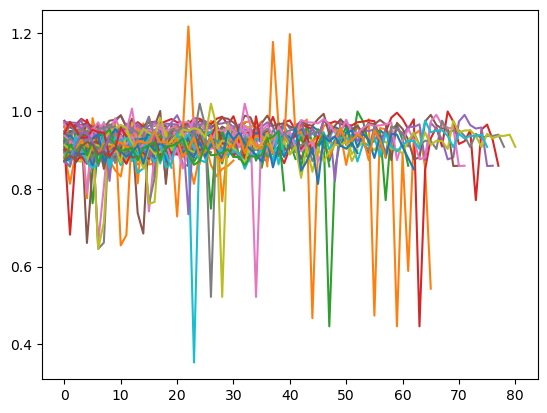

In [26]:
sub = ['I096','I107','I110','I111','I112', 'I122', 'I116', 'I127', 'I128', 'I154','I160','I161','I170','I172']

robust_session = [[4,5],[3,4,6],[5,7,9,10,13,14],[3,4,5,8,9,10],[5,6,7,9],
    [4,6,8],[5,6,7,8,9],[8],[3,6],[8,14,16,18],[7,9,11,14],[8,9],[9],[4,5,7]]

count = 0
total = 0

label = [] #label to track different cell type

# features across all the sessions
mad_all = []
fr_all = []
cv2_all = []
cvlog_all = []
isi_all = []
all_channels = {}
all_units = {}

# analyze all sessions data 
for n,s in enumerate(sub):
    if n in range(0,14):
        list_dir = os.listdir('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\')
#         for m,dirc in enumerate(list_dir): 
#             list_path = natsorted(os.listdir('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\'+ list_dir[m] ))
        list_data = [data for data in list_dir if data.startswith(s)]

        for i,path in enumerate(list_data):
            read_path=('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\'+path)
#             print(read_path)
            unit = 0
            ch_num = 0
            if i+3 in robust_session[n]:
                print(path)
                # read Cb data
                data,ch,cell = read_Cb_data(read_path)
                all_channels[path]=ch
                
                #get all spiking features
                cv2 = get_cv2(data)
                cv2 = np.array(cv2)
                plt.plot(cv2)
                all_units[path]=[cell]
                
                    
                fr = get_firing_rate(data)
                fr = np.array(fr)

                mad = get_mad(data)
                mad = np.array(mad)
                
                cvlog = get_cvlog(data)
                cvlog = np.array(cvlog)
            
                isi_data = get_isi(data)
                isiperc5 = get_isiperc5(isi_data)
#                 isi_data = (isi_data)
                
                for x in range(len(data)):
                    
#                     if cv2[x] > 0.2 and fr[x] > 40 and mad[x] < 0.008 and cvlog[x] < 0.34:
                    if cv2[x] > 0.2 and fr[x] > 40 and mad[x] < 0.008:                       
#                         print("!!!!!!!!!!!!!!!!Purkinje Found!!!!!!!!!!!!!!!!!")
                        print("CV2: "+ str(cv2[x]) + ", FR: "+ str(fr[x]) + ", MAD: "+ str(mad[x])+ ", CVlog: "+ str(cvlog[x]) + ", ISIperc5: "+ str(isiperc5[x]))
                        count = count +1
                        label.append(1)

                        
                    # extra code to identify unipolar brush cell and basket and stellate cells
                    elif mad[x] > 0.01 and cv2[x] < 0.24:
                        label.append(2)
                        print("CV2: "+ str(cv2[x]) + ", MAD: "+ str(mad[x]))
                    elif isiperc5[x] < 22 and cv2[x] > 0.28:
                        label.append(3)
                        print("CV2: "+ str(cv2[x]) + ", ISIperc5: "+ str(isiperc5[x]))                      
                    else:
                        label.append(0)
                        all_channels[path][unit] = -1  
                        
                    cv2_all.append((cv2[x]))
                    fr_all.append((fr[x]))
                    cvlog_all.append((cvlog[x]))
                    mad_all.append((mad[x]))
                    isi_all.append((isi_data[x]))
#                     elif fr[x] > 40:
#                         print("high firing rate unit!  " + "CVlog: "+ str(cvlog[x]))
                    
                    unit = unit + 1
#                     if unit>=len(all_channels[path]):
#                         ch_num = ch_num + 1
#                         unit = 0
                total = total + len(data)
#                 while None in all_channels[path]:
#                 # removing None from list using remove method
#                     all_channels[path].remove(None)
#                 plt.plot(fr)

In [13]:
# Save all purkinje cell information
from scipy.io import savemat
savemat("purkinje_ch_all.mat", {'channels':all_channels})
savemat("purkinje_units_all.mat", {'units':all_units})

In [15]:
ch_data = []
total_len = 0
for name in all_channels:
    ch_data.append([*set(all_channels[name])])
    total_len += len(all_channels[name])
print(ch_data)
print(total_len)
print(total)

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, -1], [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, -1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, -1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, -1]]
186
186


In [98]:
## read posrt sorted CB data for analysis
from collections import defaultdict
analyzed = os.listdir('Z:\\Rohit\\BMI_Data\\psort_data\\Analyzed\\')
p_channels = defaultdict(list)
for f in analyzed:
    if(f.endswith('_resorted.psort')):
        ch  = f[-20:-15]
        ch  = ch.split("_")
        ch  = ch[-1]
        path = f[:18] 
        p_channels[path].append(int(ch))

print(p_channels)        
print(all_channels) 

defaultdict(<class 'list'>, {'I110-220308-135616': [12], 'I111-220420-140505': [16], 'I111-220421-143139': [27], 'I111-220422-135940': [43], 'I112-220520-133714': [12], 'I112-220523-134750': [10], 'I116-220829-152425': [35], 'I122-220727-132002': [37], 'I170-240325-143330': [42, 61, 67, 69, 88]})
{'I096-211104-134920': [3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 11, 12, 13, 14], 'I096-211105-114444': [1, 2, 2, 3, -1, 4, 6, 6, 7, 8, 8, -1, 9, 9, 10, 10, 11, 11, 12, 12, 12, -1, 13, 14, -1, 15, 15, 15, 16, 16, 17], 'I107-211220-121436': [1, 1, -1, 2, -1, 3, 4, -1, 4, 5, 5, 6, 6, 6, 7, -1, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11, -1, 11, 12, 12, 13, 13, 14, -1, -1, 15, 15, 15, 16, 16, 16, 17], 'I107-211221-105947': [1, 2, 2, 3, -1, -1, 4, 5, 5, 5, 6, 6, -1, -1, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, -1, 14, -1, 15, 15, -1, 16, 16, -1, 17, 17, 18], 'I107-211223-105431': [2, 3, 4, 4, -1, -1, 5, 6, 6, 6, 7, 8, 8, 8, 9, 9, 10, 10, 11, 11, 11, 12, 13, 13, 13, 14, 14, 15, 15, 15, 16, 1

In [110]:
count = 0
c = 0
label_p = []
a = [0, -1, 1, -1, 2, -1, 3, 35, -1, -1, -1, 22, 37, 53, 23, 7, 24, 8, 40, 56, -1, 41, 57, 10, 27, 59, 28, 12, 29, 44, 61, 13, 45, 62, 63, 15, 31, 61, -1, 63]
b = [1, -1, 2, -1, 3, -1, 4, 4, -1, -1, -1, 6, 6, 6, 7, 8, 8, 9, 9, 9, -1, 10, 10, 11, 11, 11, 12, 13, 13, 13, 13, 14, 14, 14, 15, 16, 16, 16, -1, 18]


for name in all_channels:

    if name in ['I170-240325-143330']:
        for val in a:
            count +=1
            if val+32 in p_channels[name]:
                print(val)
                print(p_channels[name])
                label_p.append(1)
            else: 
                label_p.append(0)
    
    elif name in ['I122-220727-132002']:
        for val in all_channels[name]:
            count +=1
            if val+33 in p_channels[name]:
                print(val)
                print(p_channels[name])
                label_p.append(1)
            else: 
                label_p.append(0)
                
    elif name in p_channels:
        for val in all_channels[name]:
            count +=1
            if val in p_channels[name]:
                print(val)
                print(p_channels[name])
                print(name)
                label_p.append(1)
            else: 
                label_p.append(0)
    else:
#         print(name)
        for val in all_channels[name]:
            label_p.append(0)
            count +=1

            

print(len(label_p))

print(len(label))

12
[12]
I110-220308-135616
16
[16]
I111-220420-140505
27
[27]
I111-220421-143139
43
[43]
I111-220422-135940
12
[12]
I112-220520-133714
12
[12]
I112-220520-133714
12
[12]
I112-220520-133714
10
[10]
I112-220523-134750
10
[10]
I112-220523-134750
10
[10]
I112-220523-134750
10
[10]
I112-220523-134750
4
[37]
4
[37]
4
[37]
35
[35]
I116-220829-152425
35
[42, 61, 67, 69, 88]
37
[42, 61, 67, 69, 88]
56
[42, 61, 67, 69, 88]
10
[42, 61, 67, 69, 88]
29
[42, 61, 67, 69, 88]
1893
1893


# tSNE embedding

In [112]:
import numpy as np

from sklearn.manifold import TSNE

X = np.stack( (np.array(fr_all),np.array(mad_all), np.array(cv2_all)),  axis=1)



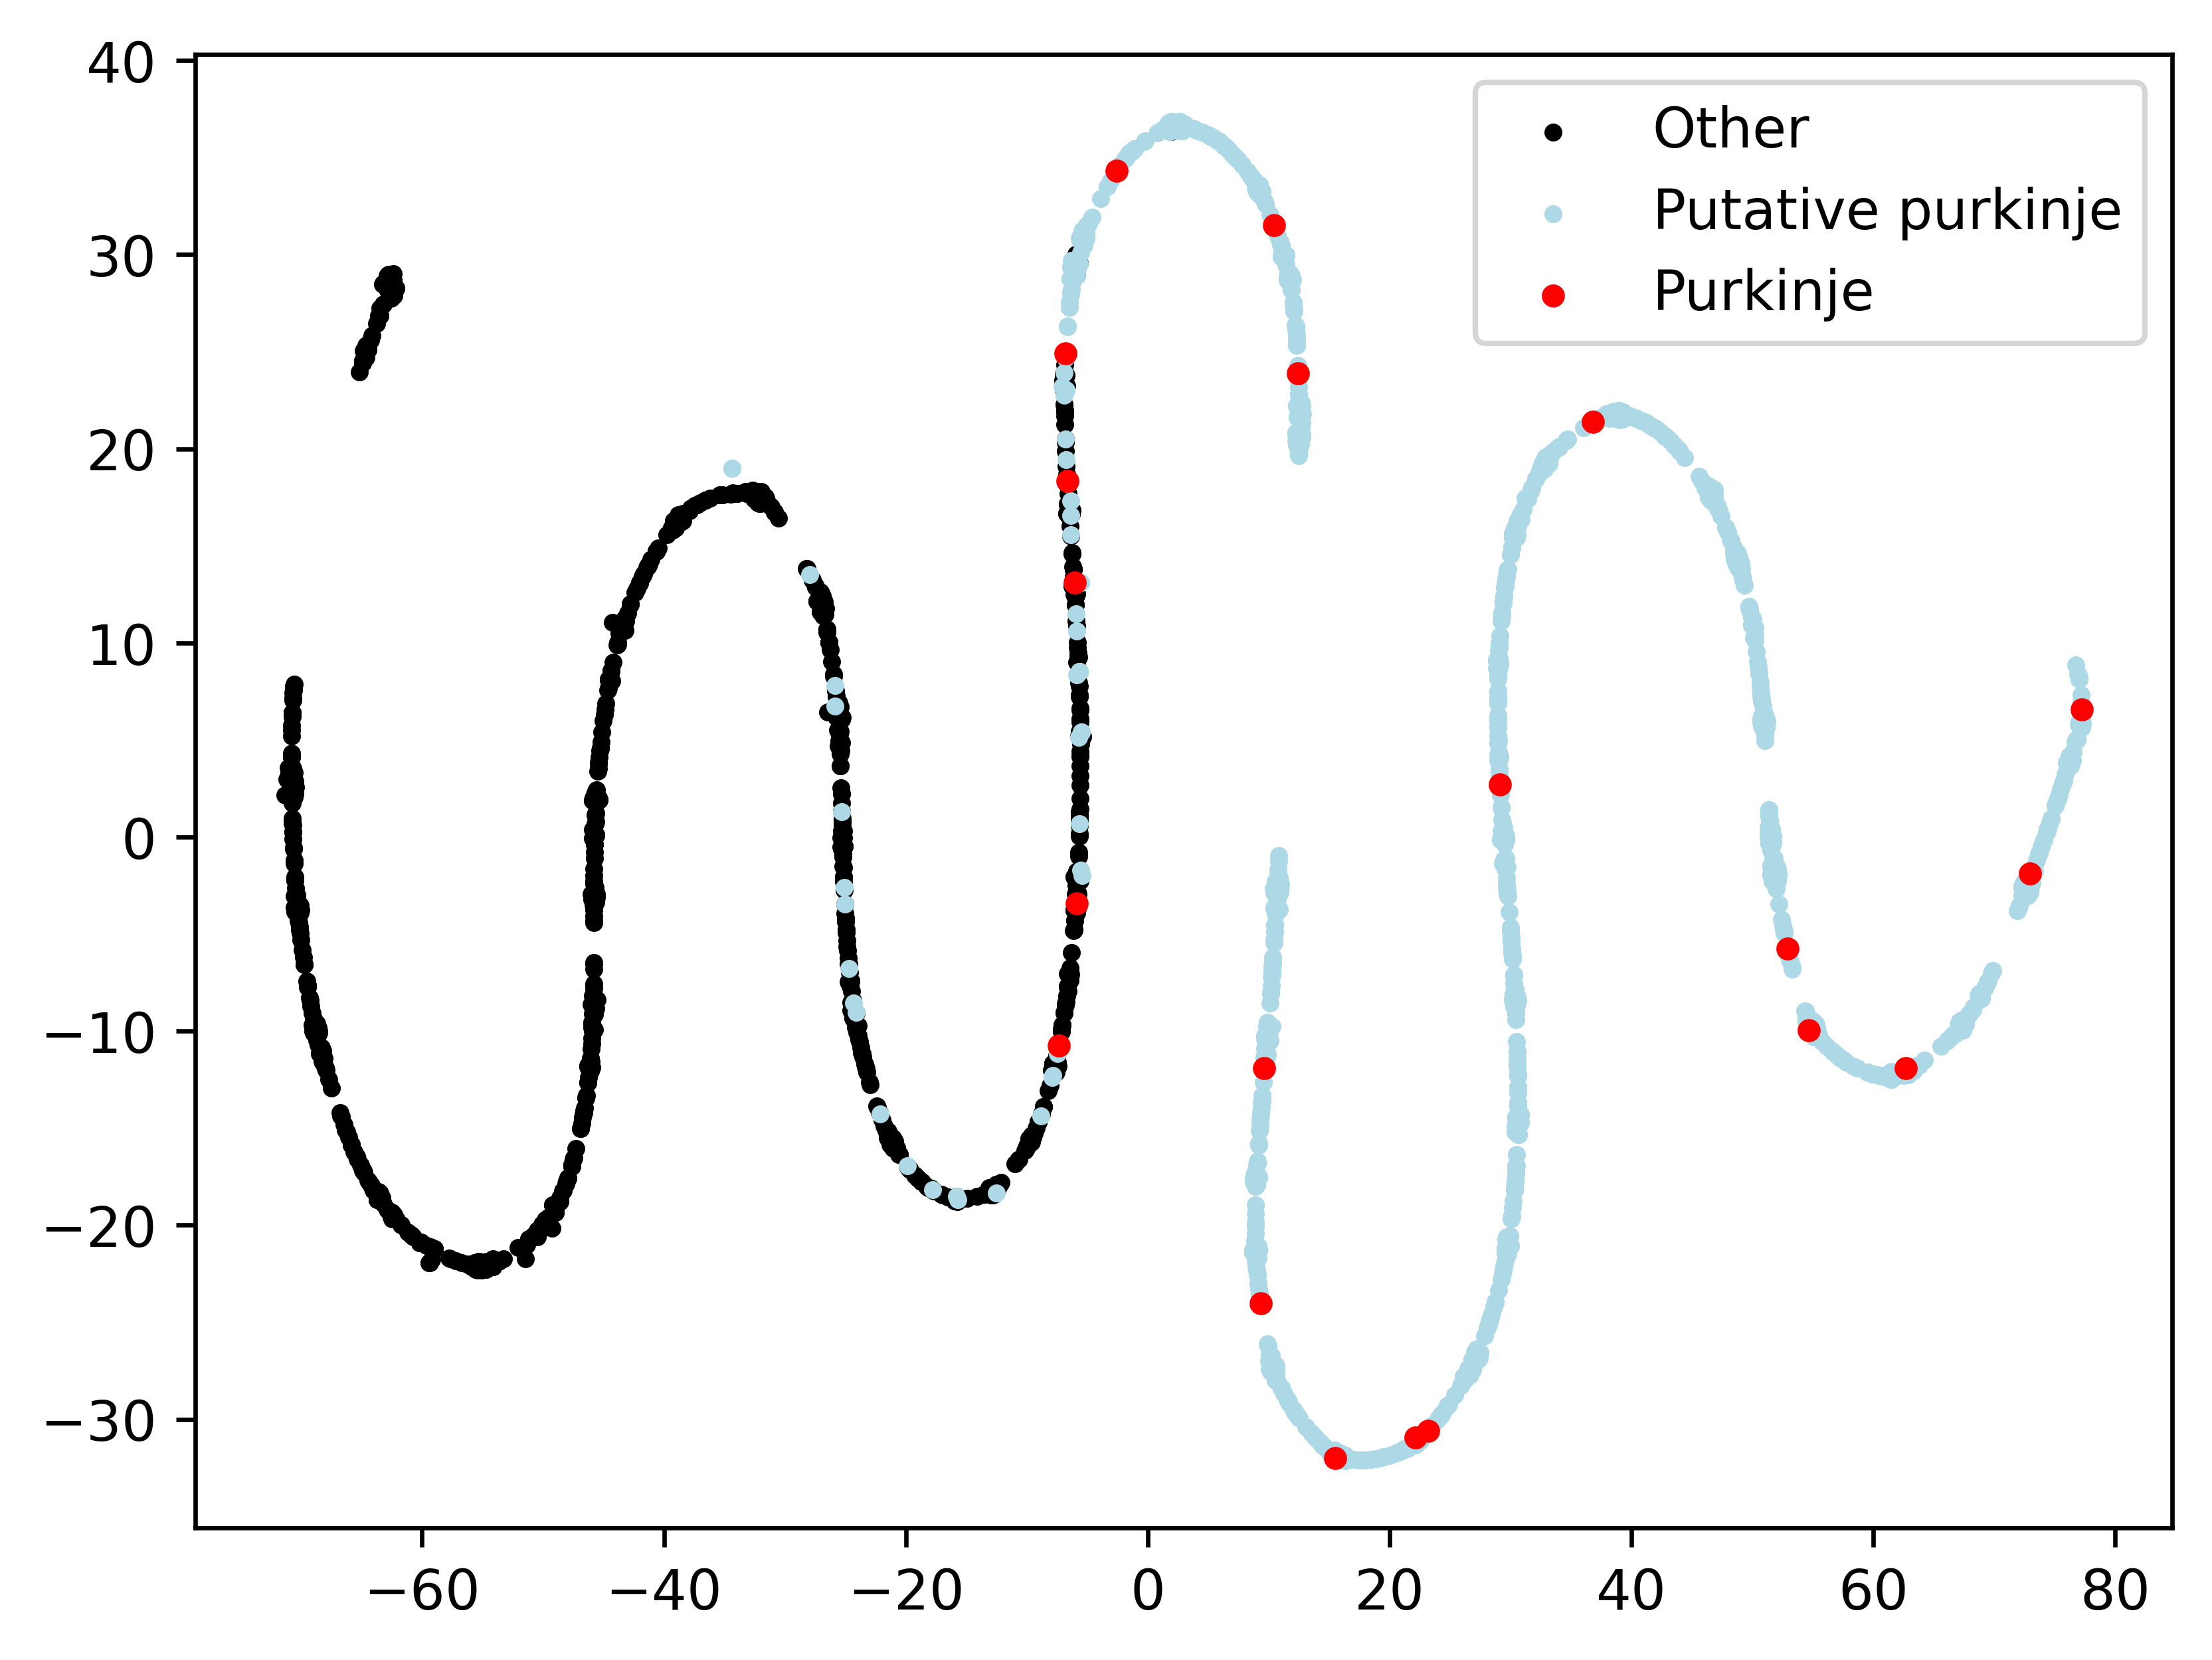

In [113]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

plt.scatter(X_embedded[np.nonzero(np.transpose(label)==0),0],X_embedded[np.nonzero(np.transpose(label)==0),1],color='black',s=5,label='Other')

plt.scatter(X_embedded[np.nonzero(label),0],X_embedded[np.nonzero(label),1],color='lightblue',s=5,label="Putative purkinje")
        
plt.scatter(X_embedded[np.nonzero(label_p),0],X_embedded[np.nonzero(label_p),1],color='red',s=10,label="Purkinje")

plt.legend()

# PCA and other comparison

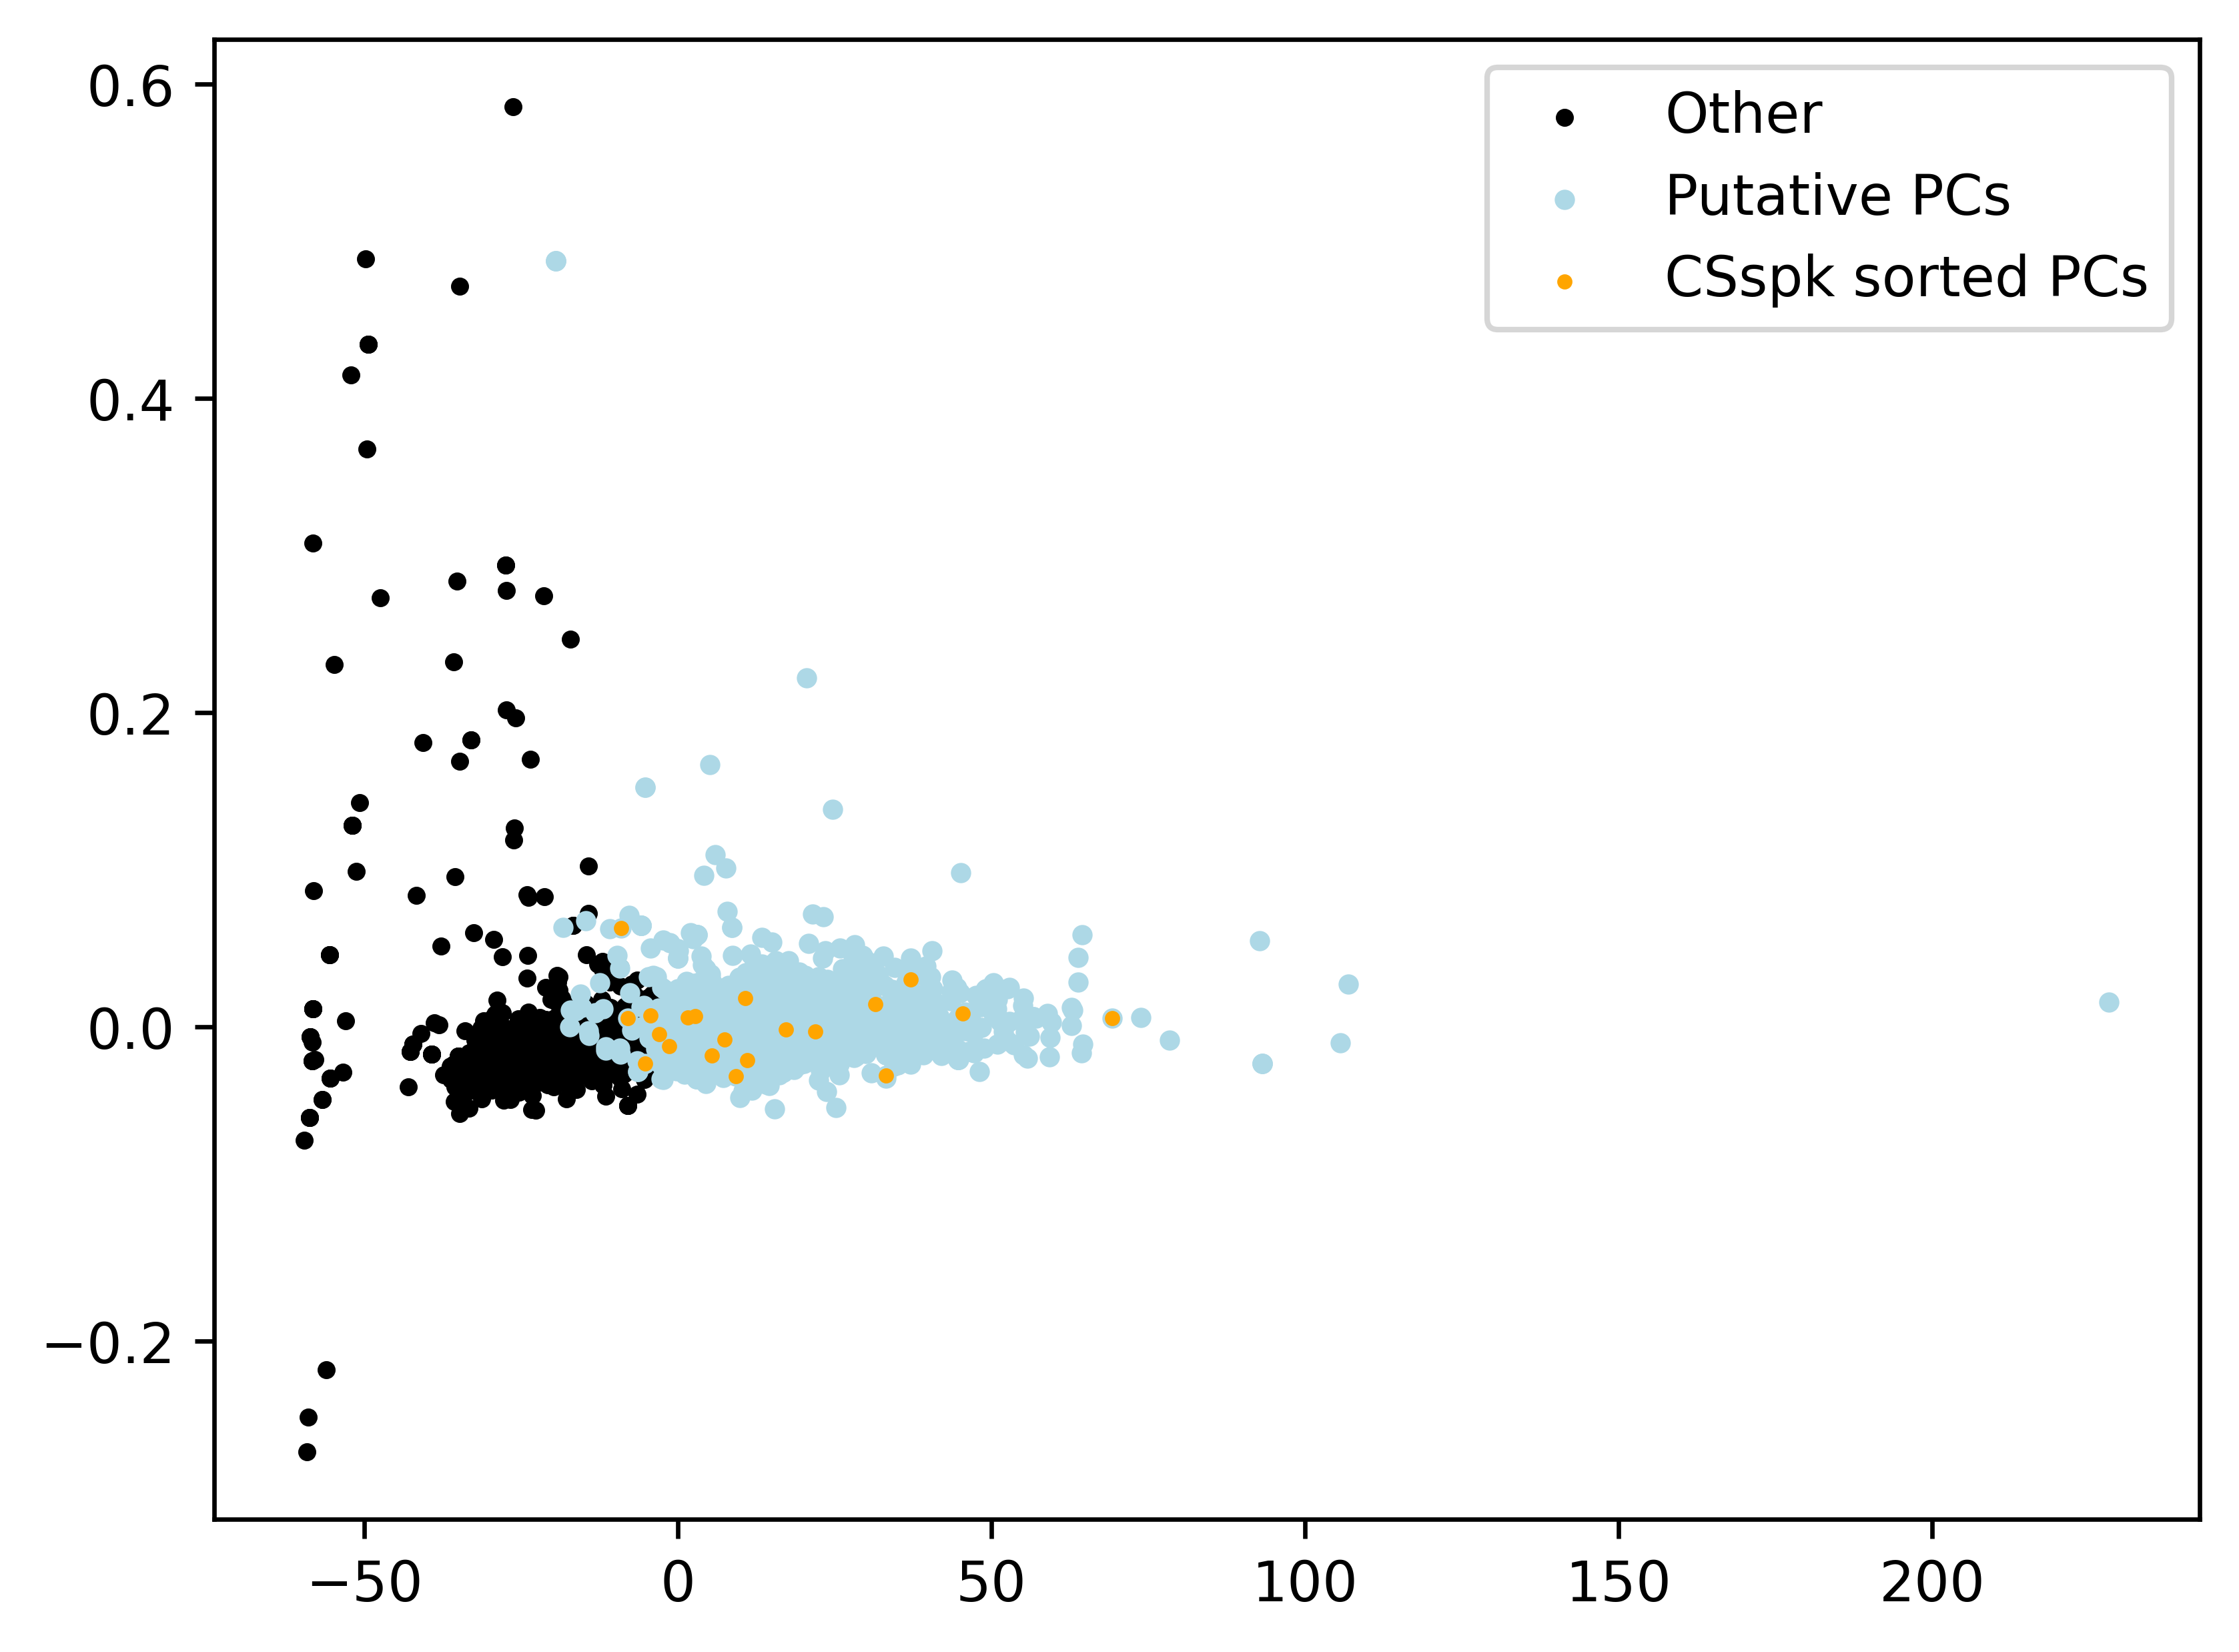

In [122]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600

from sklearn.decomposition import PCA

X_embedded = PCA(n_components=2).fit_transform(X)
plt.scatter(X_embedded[np.nonzero(np.transpose(label)==0),0],X_embedded[np.nonzero(np.transpose(label)==0),1],color='black',s=5,label='Other')

plt.scatter(X_embedded[np.nonzero(label),0],X_embedded[np.nonzero(label),1],s=7,facecolors='lightblue', edgecolors='lightblue',label="Putative PCs")
        
plt.scatter(X_embedded[np.nonzero(label_p),0],X_embedded[np.nonzero(label_p),1],color='orange',s=3,label="CSspk sorted PCs")

plt.legend()

plt.savefig('PCA_SS.svg', format='svg', dpi=1200)

In [ ]:

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600

from sklearn.decomposition import PCA

X_embedded = PCA(n_components=2).fit_transform(X)
plt.scatter(X_embedded[np.nonzero(np.transpose(label)==0),0],X_embedded[np.nonzero(np.transpose(label)==0),1],color='black',s=5,label='Other')

plt.scatter(X_embedded[np.nonzero(label),0],X_embedded[np.nonzero(label),1],s=7,facecolors='lightblue', edgecolors='lightblue',label="Putative PCs")
        
plt.scatter(X_embedded[np.nonzero(label_p),0],X_embedded[np.nonzero(label_p),1],color='orange',s=3,label="CSspk sorted PCs")

plt.legend()

plt.savefig('PCA_SS.svg', format='svg', dpi=1200)

C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


TypeError: only size-1 arrays can be converted to Python scalars

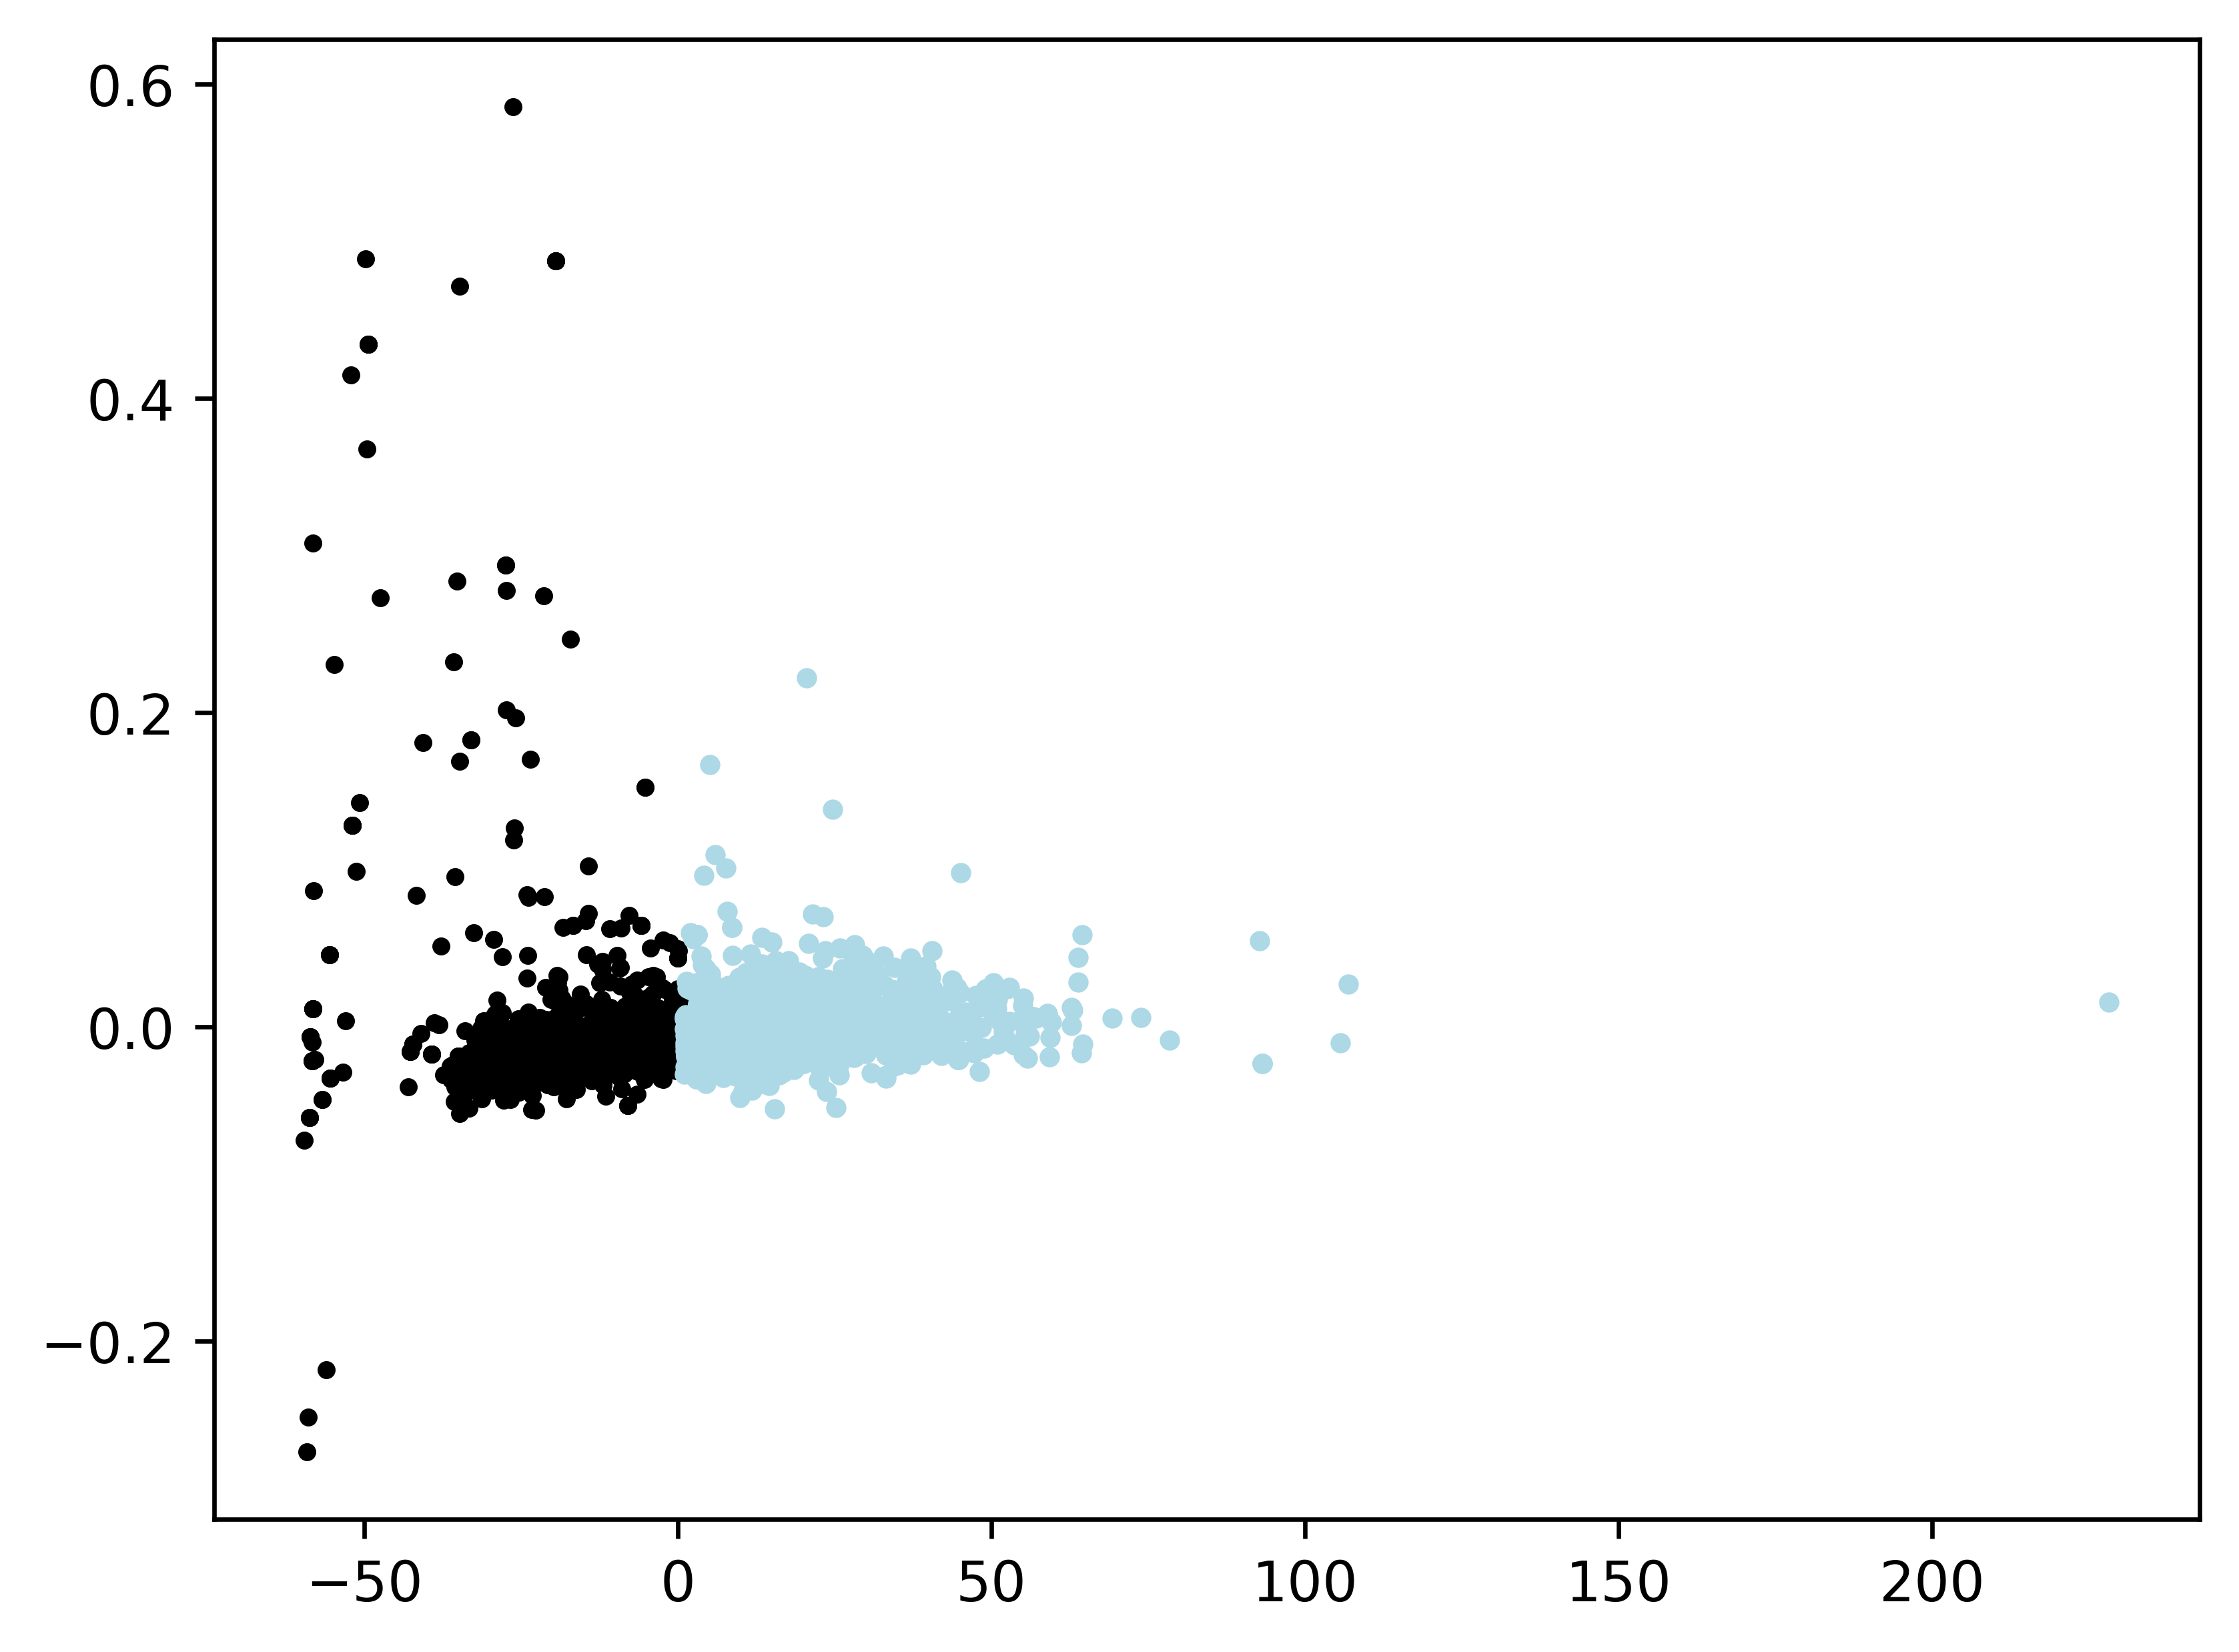

In [136]:
#kmeans clustering 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_embedded)

plt.scatter(X_embedded[np.nonzero(kmeans.labels_==0),0],X_embedded[np.nonzero(kmeans.labels_==0),1],color='black',s=5,label='Other')

plt.scatter(X_embedded[np.nonzero(kmeans.labels_),0],X_embedded[np.nonzero(kmeans.labels_),1],s=7,facecolors='lightblue', edgecolors='lightblue',label="Putative PCs")



C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 34 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set

C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Tanuj\anaconda3\envs\elephant\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Tanuj\anaconda3\env

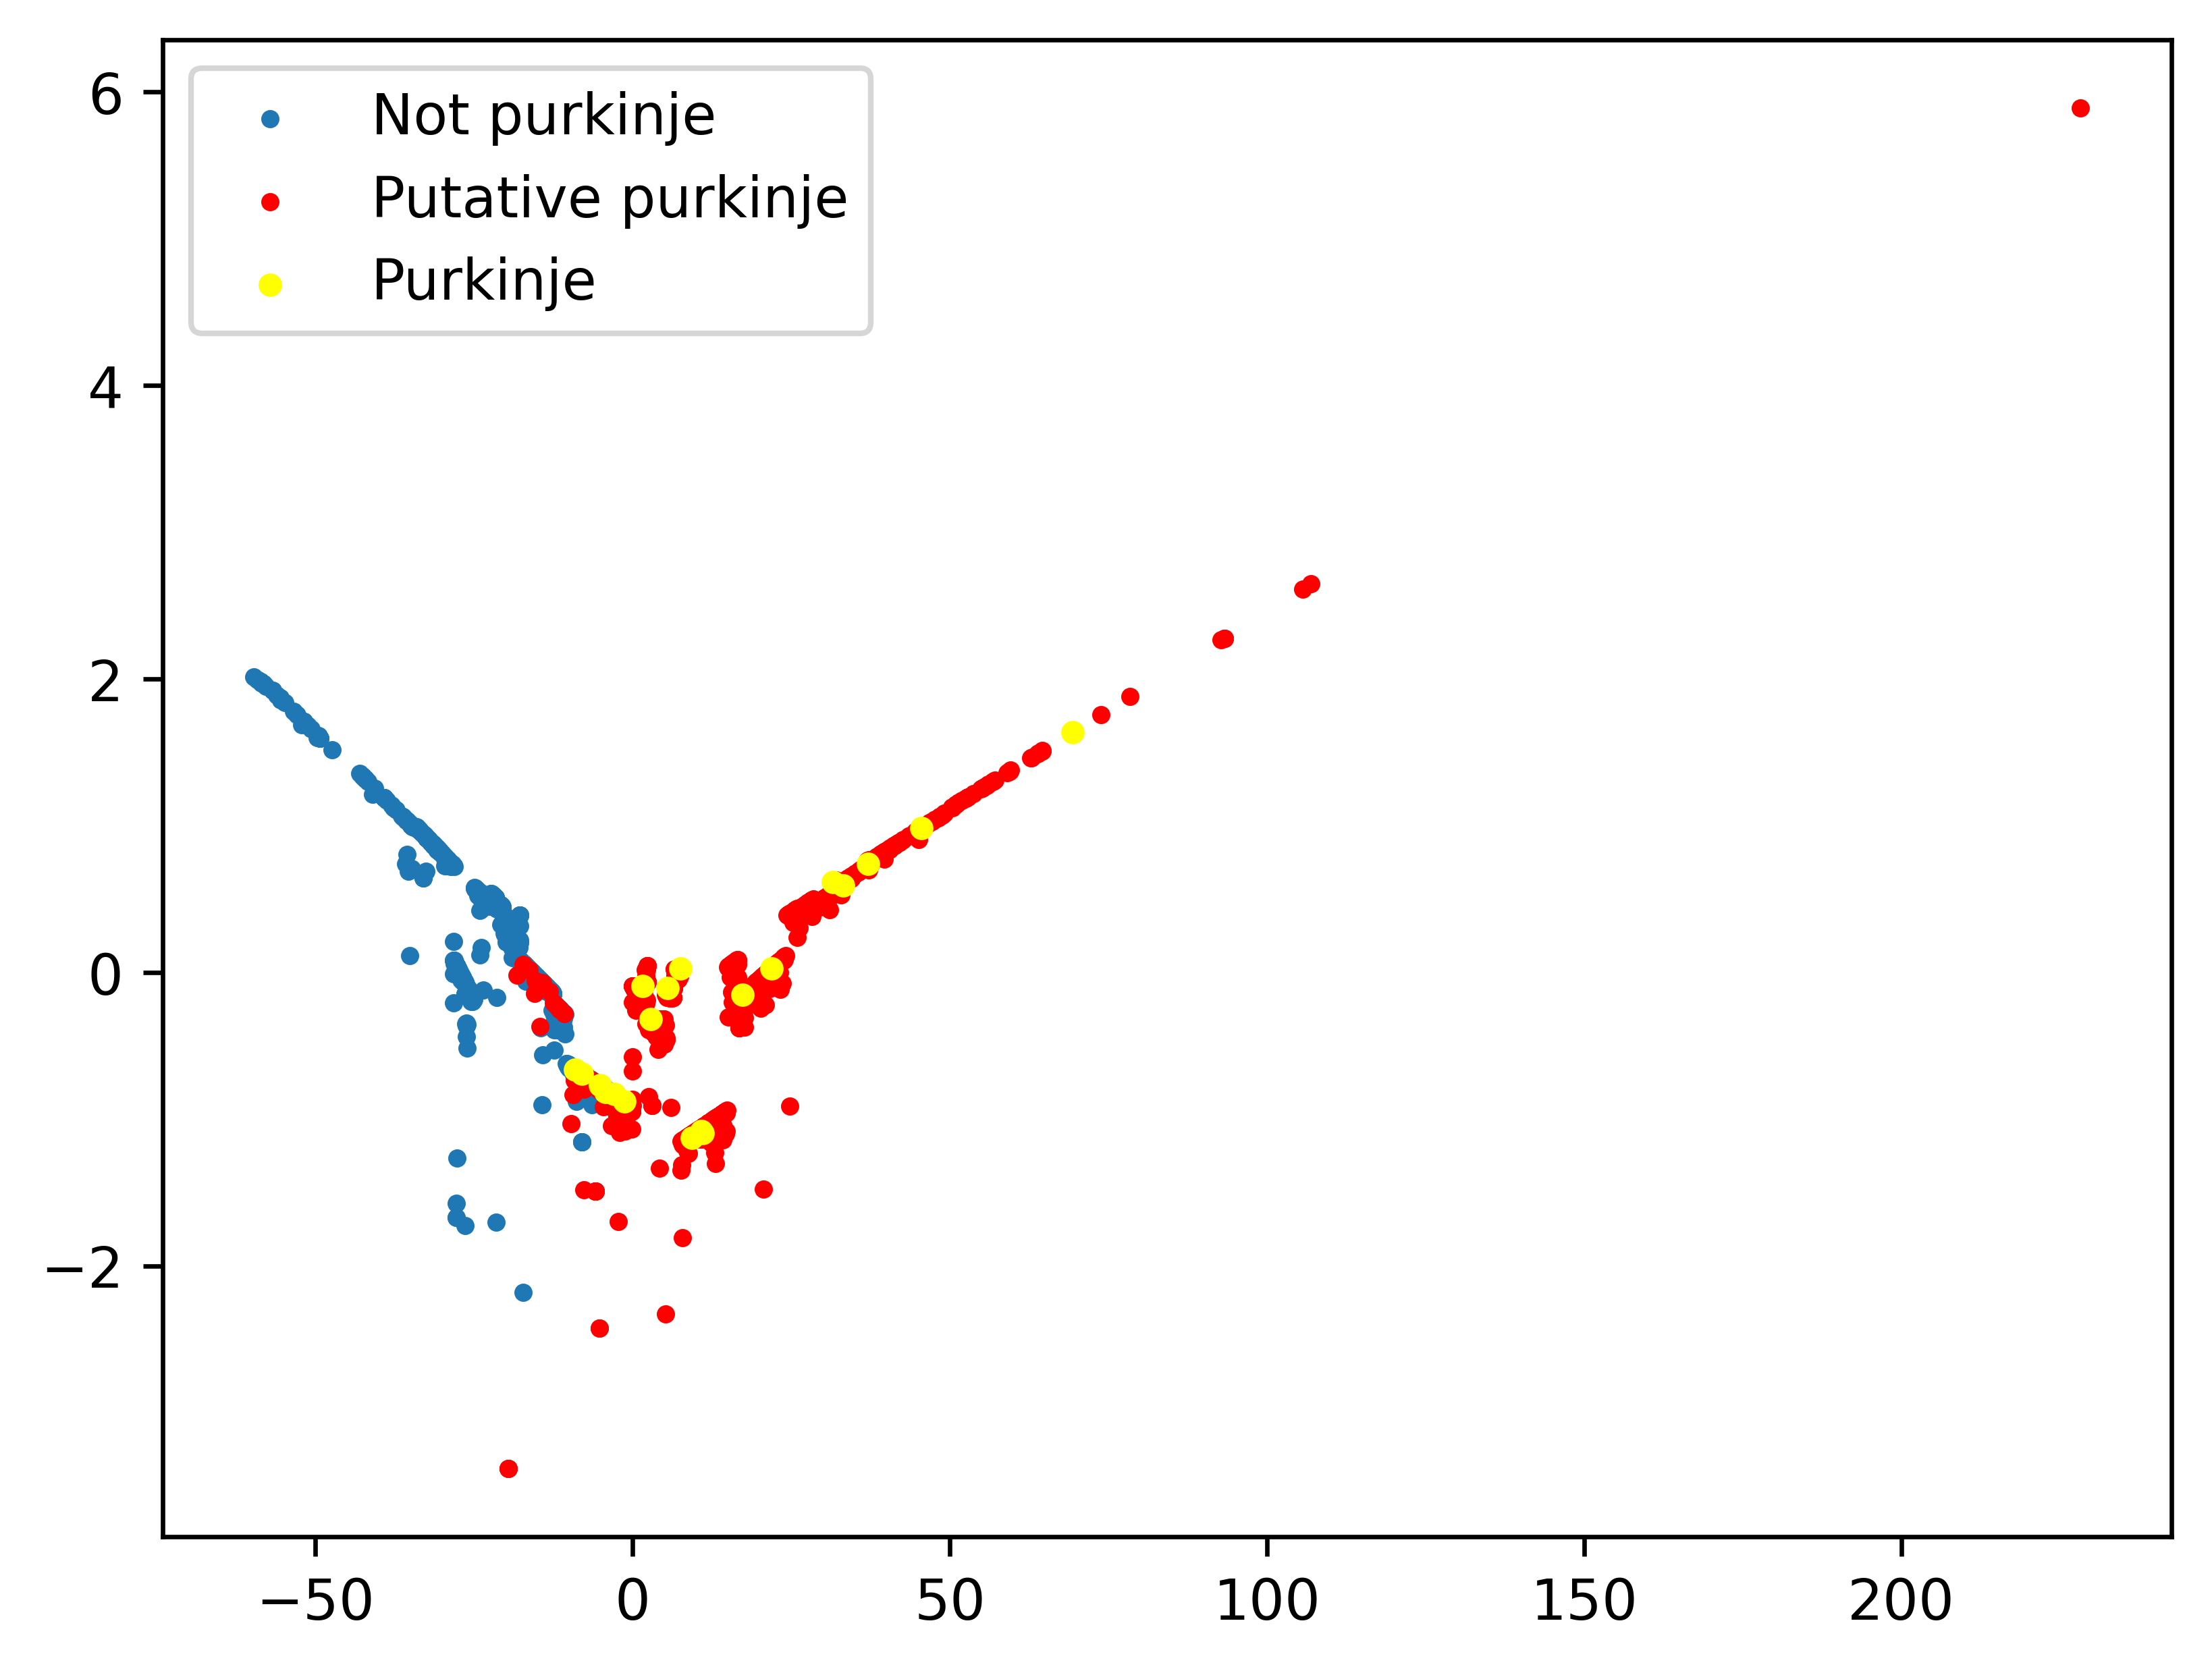

In [121]:
#ISOMAP clustering 

from sklearn import manifold
isomap = manifold.Isomap(n_components=2)
X_embedded = isomap.fit_transform(X)

plt.scatter(X_embedded[np.nonzero(np.transpose(label)==0),0],X_embedded[np.nonzero(np.transpose(label)==0),1],s=5,label='Not purkinje')


plt.scatter(X_embedded[np.nonzero(label),0],X_embedded[np.nonzero(label),1],color='red',s=5,label="Putative purkinje")
        
plt.scatter(X_embedded[np.nonzero(label_p),0],X_embedded[np.nonzero(label_p),1],color='yellow',s=10,label="Purkinje")

plt.legend()

20

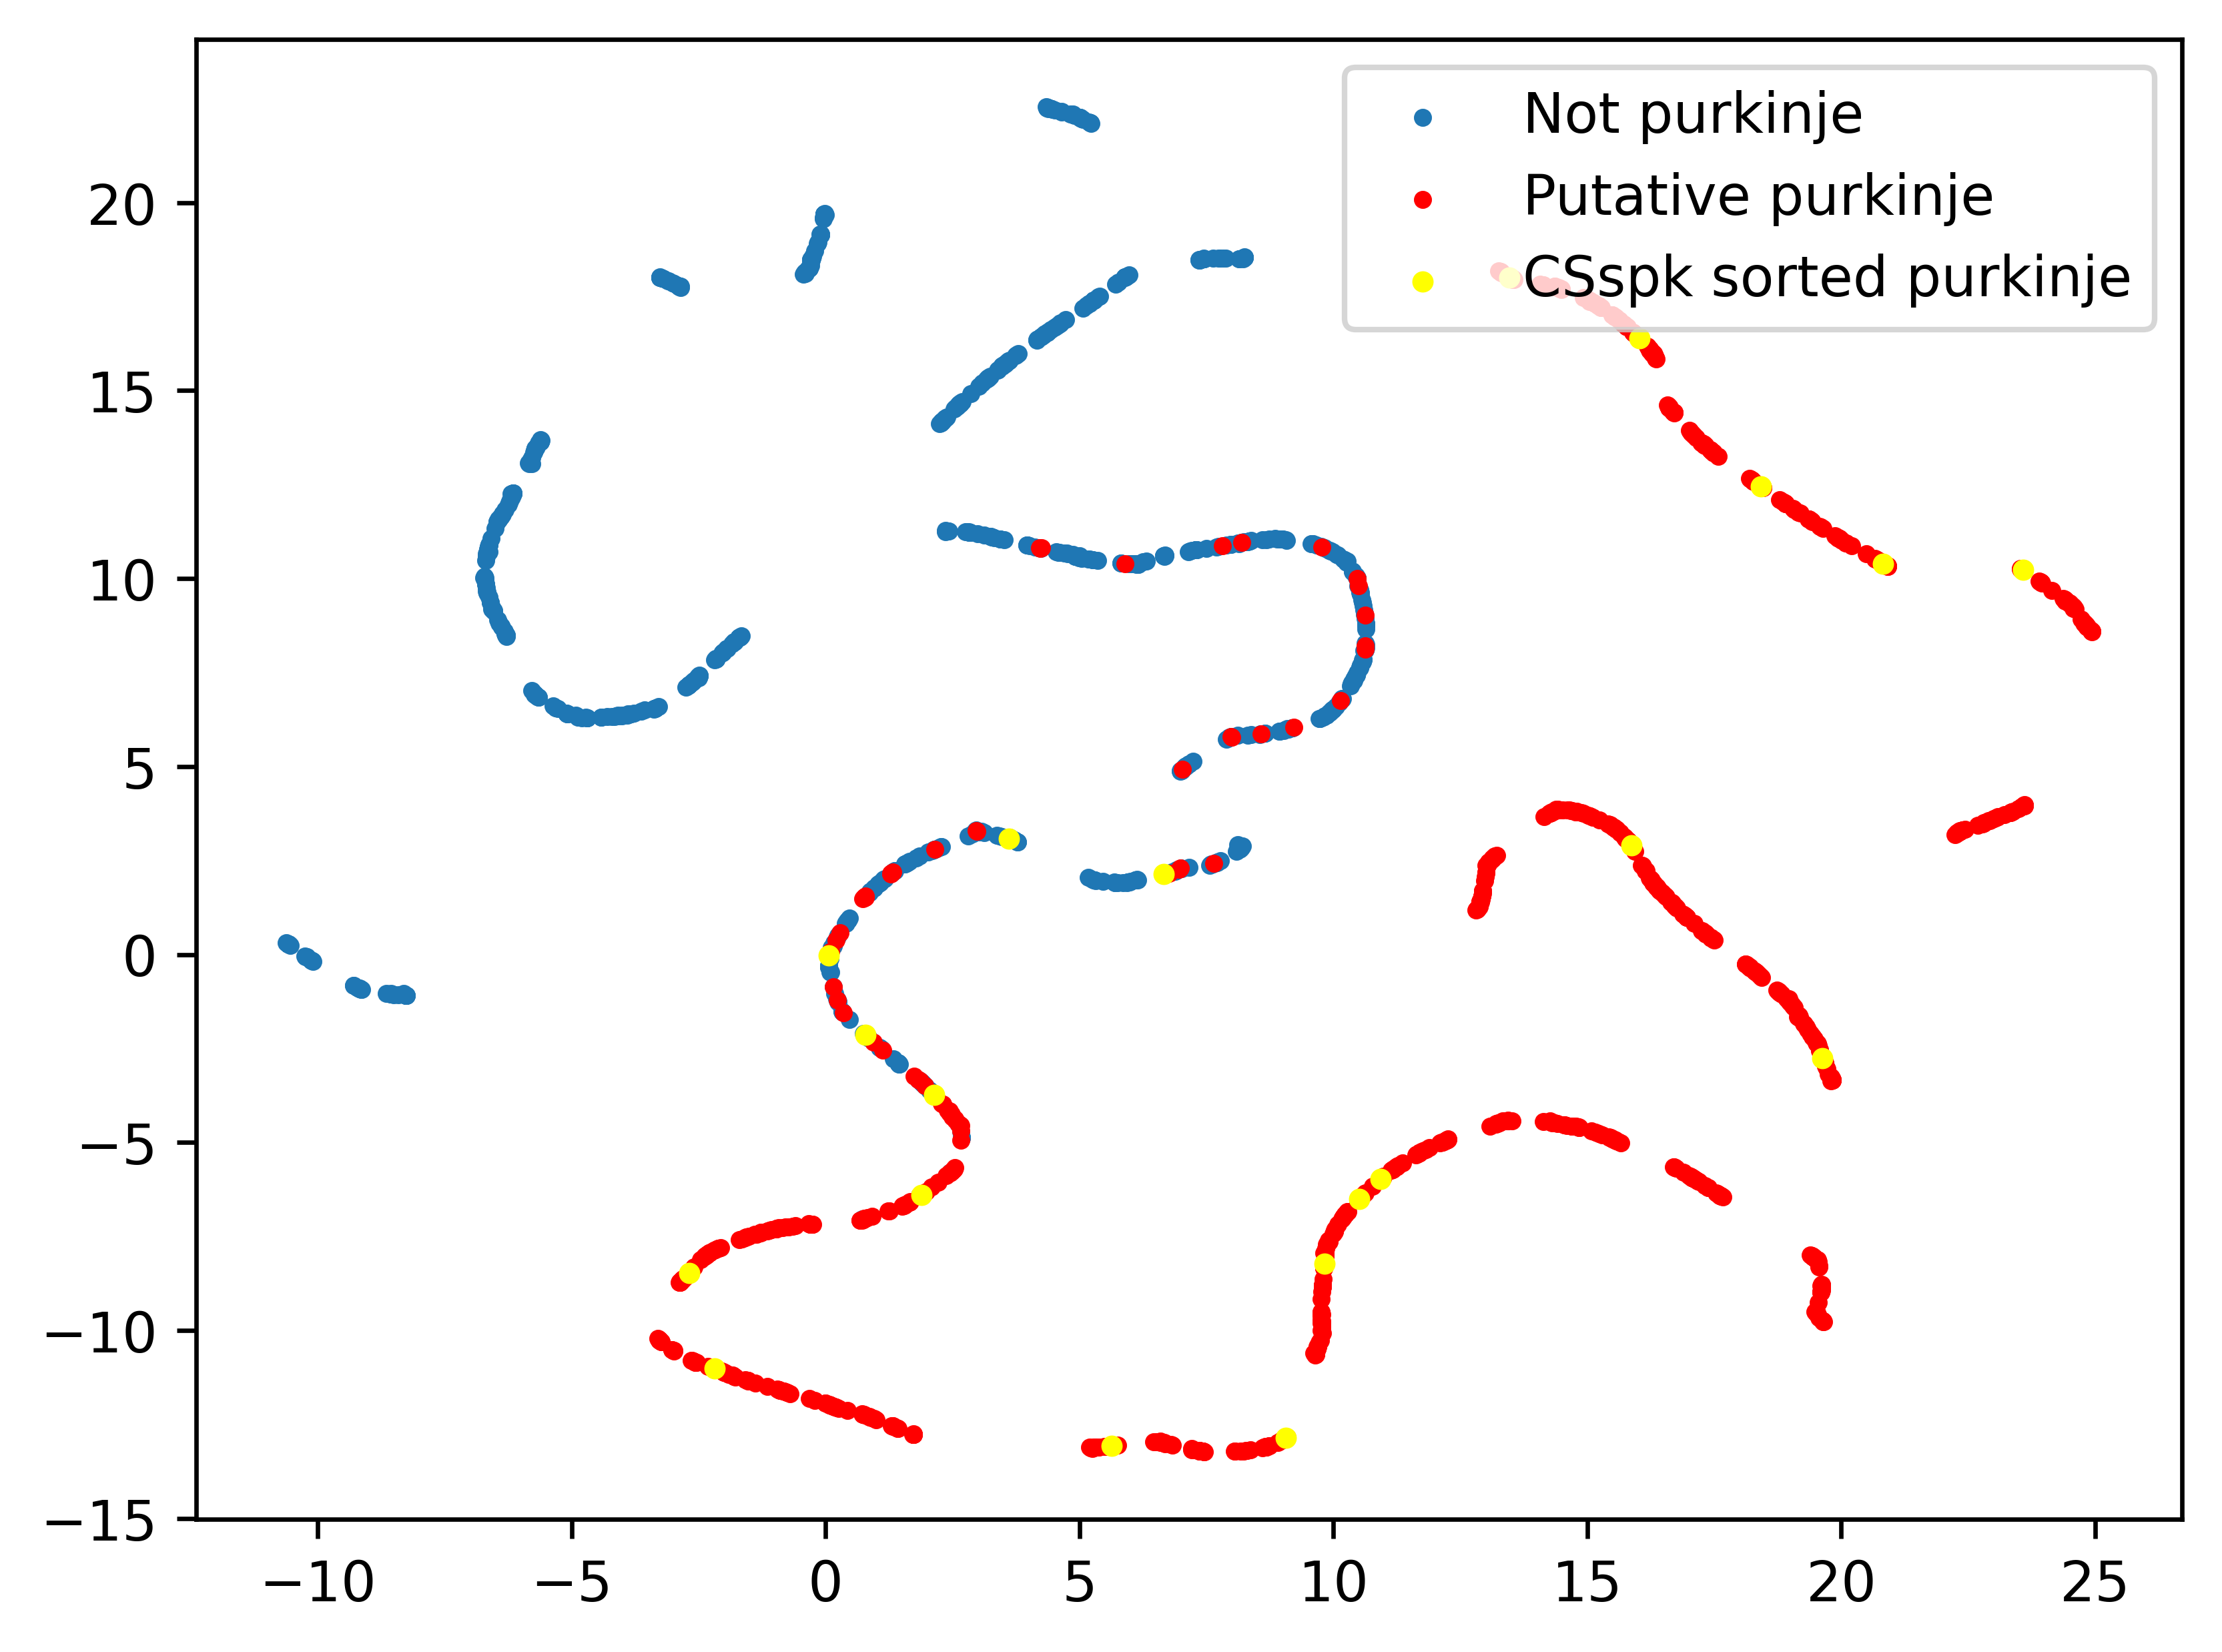

In [119]:
#UMAP clustering

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600

from umap import UMAP
reducer = UMAP()
X_embedded = reducer.fit_transform(X)
X_embedded.shape

plt.scatter(X_embedded[np.nonzero(np.transpose(label)==0),0],X_embedded[np.nonzero(np.transpose(label)==0),1],s=5,label='Not purkinje')


plt.scatter(X_embedded[np.nonzero(label),0],X_embedded[np.nonzero(label),1],color='red',s=5,label="Putative purkinje")
        
plt.scatter(X_embedded[np.nonzero(label_p),0],X_embedded[np.nonzero(label_p),1],color='yellow',s=8,label="CSspk sorted purkinje")


plt.legend(loc=1)
        
sum(label_p)

# Check cell type for all direct units

I096-211104-134920
I096-211105-114444
I107-211220-121436
I107-211221-105947
I107-211223-105431
I110-220309-110740
I110-220310-135226
I110-220311-101925
I110-220329-102528
I110-220329-112423
I111-220420-140505
CV2: 0.6837347177147404, FR: 57.762141683778594, MAD: 0.004711042158760392, CVlog: -0.1910813384092914
I111-220421-143139
I111-220422-135940
I111-220426-142615
I111-220427-140721
I111-220503-144526
I112-220520-133714
I112-220524-141320
I112-220526-133954
I122-220727-132002
I122-220728-144045
I122-220729-122055
I116-220826-141257
I116-220829-143114
I116-220829-152425
I116-220830-143836
I116-220831-112826
I127-221207-125913
I128-230127-150013
I128-230202-144022
I154-230711-141255
I154-230721-153714
I154-230726-105352
I154-230727-151120
I160-231107-145000
I160-231117-141759
CV2: 0.7177063925172479, FR: 76.62121144034177, MAD: 0.003905735807165911, CVlog: -0.20043989969033466
I160-231121-111022
I160-231130-111651
I161-240213-144834
I161-240214-143022
I170-240325-143330


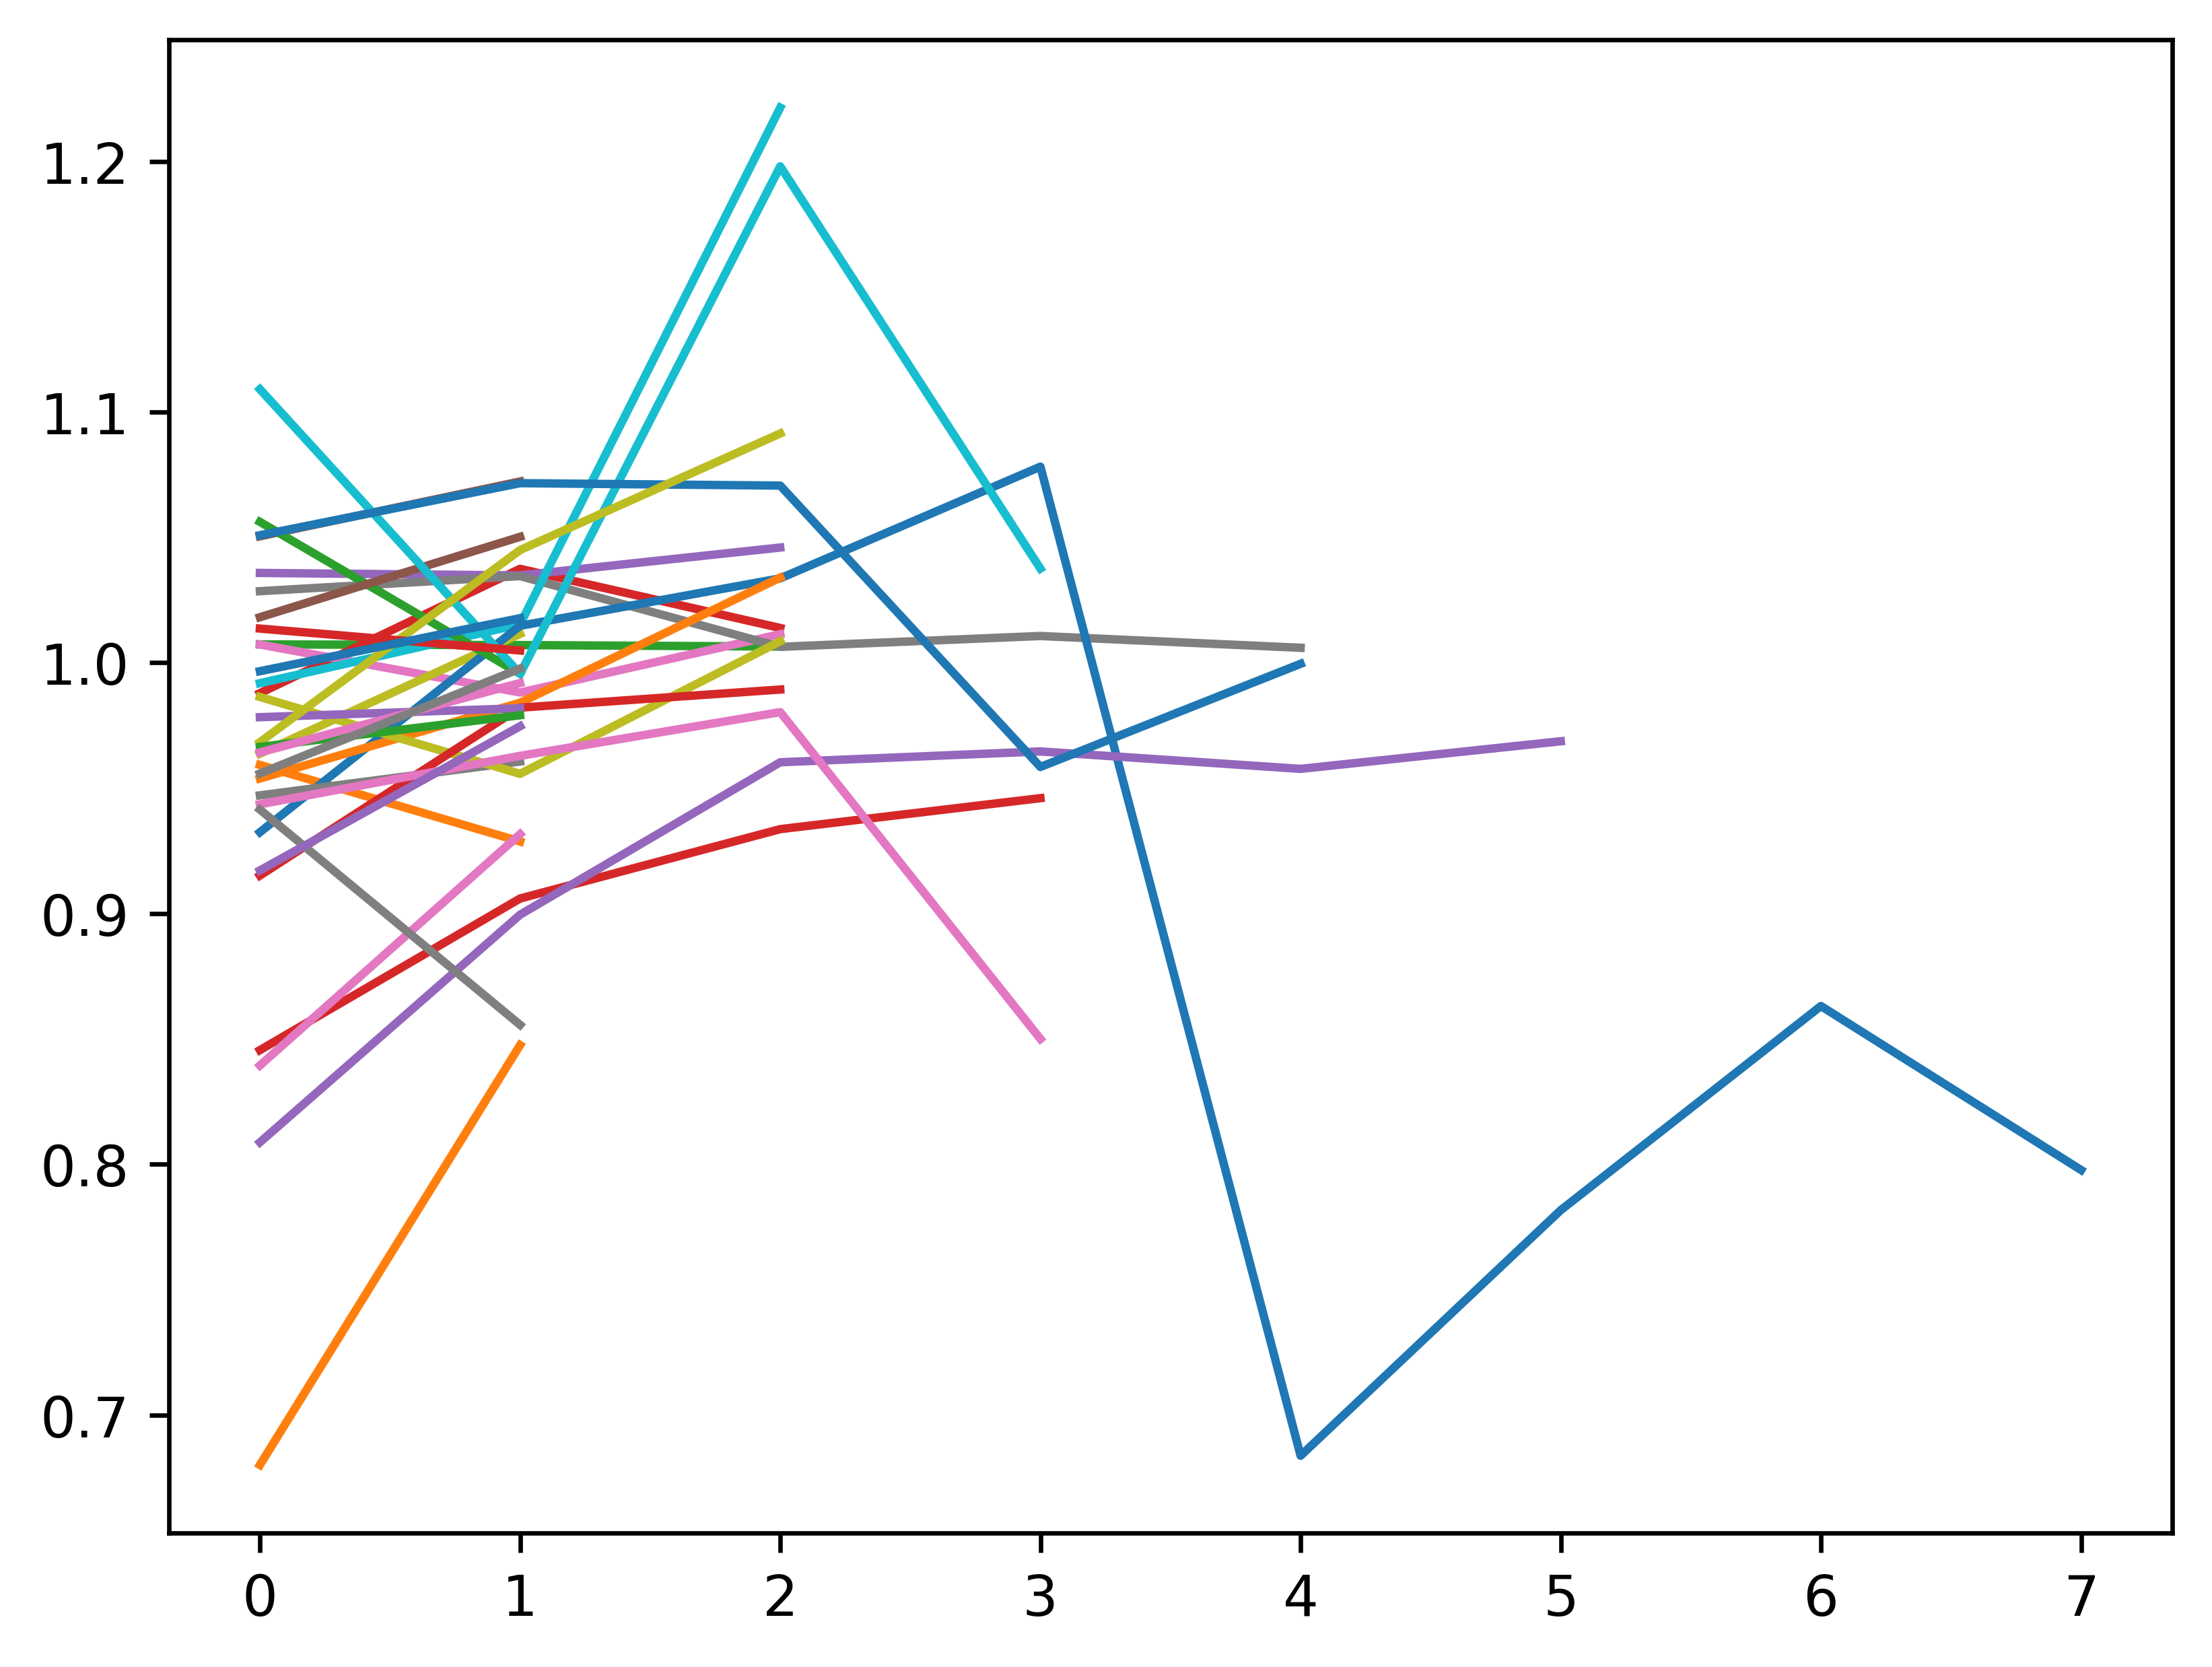

In [24]:


# sub = ['I096','I107','I110','I111','I112', 'I122', 'I116', 'I117', 'I127', 'I128','I154','I160']
# # robust_session = [[4,5],[3,4,6],[5,7,8,9,10,13,14],[3,4,5,8,9,10],[5,6,7,9],
# #     [4,6,8],[5,6,7,8,9],[8],[7,8],[3,5,6]]
# robust_session = [[4],[3],[5,7,8,10,13],[3,4,5,8],[5,6,9],
#     [4],[5,7,8],[8],[7],[3,5,6],[8,14,15,16,18,19],[7,9,11,14]]
count = 0
total = 0
label = []
for n,s in enumerate(sub):
    if n in range(0,13):
        list_dir = os.listdir('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\')
#         for m,dirc in enumerate(list_dir): 
#             list_path = natsorted(os.listdir('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\'+ list_dir[m] ))
        list_data = [data for data in list_dir if data.startswith(s)]
        for i,path in enumerate(list_data):
            read_path=('Z:\\Rohit\\BMI_Data\\'+ s +'\\Data\\'+path)
#             print(read_path)
            if i+3 in robust_session[n]:
                print(path)
                data = read_Direct(read_path)
#                 print(data)
#                 for i in range(len(data)): data[i] = np.array(data[i][:])
#                 print(data)
                cv2 = get_cv2(data)
                cv2 = np.array(cv2)
                plt.plot(cv2)

                    
                fr = get_firing_rate(data)
                fr = np.array(fr)
                
                mad = get_mad(data)
                mad = np.array(mad)
                
                cvlog = get_cvlog(data)
                cvlog = np.array(cvlog)
                
                for x in range(len(data)):
                    
#                     if cv2[x] > 0.2 and fr[x] > 40 and mad[x] < 0.008 and cvlog[x] < 0.34:
                    if cv2[x] > 0.2 and fr[x] > 40 and mad[x] < 0.008:                       
#                         print("!!!!!!!!!!!!!!!!Purkinje Found!!!!!!!!!!!!!!!!!")
                        print("CV2: "+ str(cv2[x]) + ", FR: "+ str(fr[x]) + ", MAD: "+ str(mad[x])+ ", CVlog: "+ str(cvlog[x]))
                        count = count +1
                        label.append(1)
#                     elif fr[x] > 40:
#                         print("high firing rate unit!  " + "CVlog: "+ str(cvlog[x]))
                    else:
                        label.append(0)
                total = total + len(data)
#                 plt.plot(fr)